# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import random

from IPython.core.display  import HTML
from IPython.display       import Image

from colorama                import Fore, Back, Style

# 1.0 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline

    color_pal = sns.color_palette()
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimais
    pd.set_option('display.float_format', lambda x: '%.5f' % x)

    sns.set()
jupyter_settings()

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Create function to calculate percentage of values and plot the results
def plot_features(df, column, target):
    table_perc = df.groupby(target)[column].value_counts(normalize = True, sort = False) * 100
    table_perc = table_perc.reset_index(name="percentage")
    
    sns.barplot(x = column, y = 'percentage', hue = target, data = table_perc, palette = 'hls')
    labels = [i for i in range(0,105,5)]
    plt.yticks(labels)
    plt.ylabel('% ')
    return plt.show()

# 2.0 Data Reading

In [4]:
# # df = pd.read_csv('Dataset_model.csv')
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(df.shape, test.shape)

(9500, 17) (3000, 16)


# 3.0 EDA

## Descriptive Float Cols Stats

In [5]:
df.describe()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros
count,9500.00000,9500.00000,9500.00000,9500.00000,9500.00000,9500.00000,9500.00000,9500.00000,9500.00000,9500.00000,9500.00000,9500.00000,9500.00000,9500.00000
mean,6210.53295,126.39842,404.53203,1437.08642,195037.27423,611.99932,32.27082,10.86368,17.55232,21.43316,20.99032,29.83242,24.93716,66.61863
std,3603.24391,685.03600,217.69673,1156.26322,1454273.73229,2002.44388,5.10605,62.55542,120.98019,122.67739,14.80061,222.63776,183.73335,440.11852
min,1.00000,18.00000,0.08863,0.23000,10473.86535,0.00000,20.99291,0.00000,0.00000,1.00000,-5.00000,0.00000,0.00000,1.00000
25%,3091.75000,28.00000,272.36306,573.62000,26207.90039,76.08398,28.07887,2.00000,3.00000,4.00000,10.00000,9.00000,2.00000,8.00000
50%,6172.50000,38.00000,337.16959,1175.73000,45991.10600,134.20148,32.26265,3.00000,6.00000,6.00000,18.00000,14.00000,4.00000,14.00000
75%,9320.25000,47.00000,471.26466,1963.33250,80449.82925,249.18291,36.46458,6.00000,7.00000,7.00000,28.00000,18.00000,8.00000,20.00000
max,12500.00000,8598.00000,1602.04052,4998.07000,23279657.97600,10000.00000,49.56452,1496.00000,1779.00000,1479.00000,67.00000,4388.00000,2589.00000,5788.00000


In [6]:
numerical_cols = [col for col in df.columns if df[col].dtype == 'float64']
int_cols = [col for col in df.columns if df[col].dtype == 'int64' and col not in ('id_cliente')]

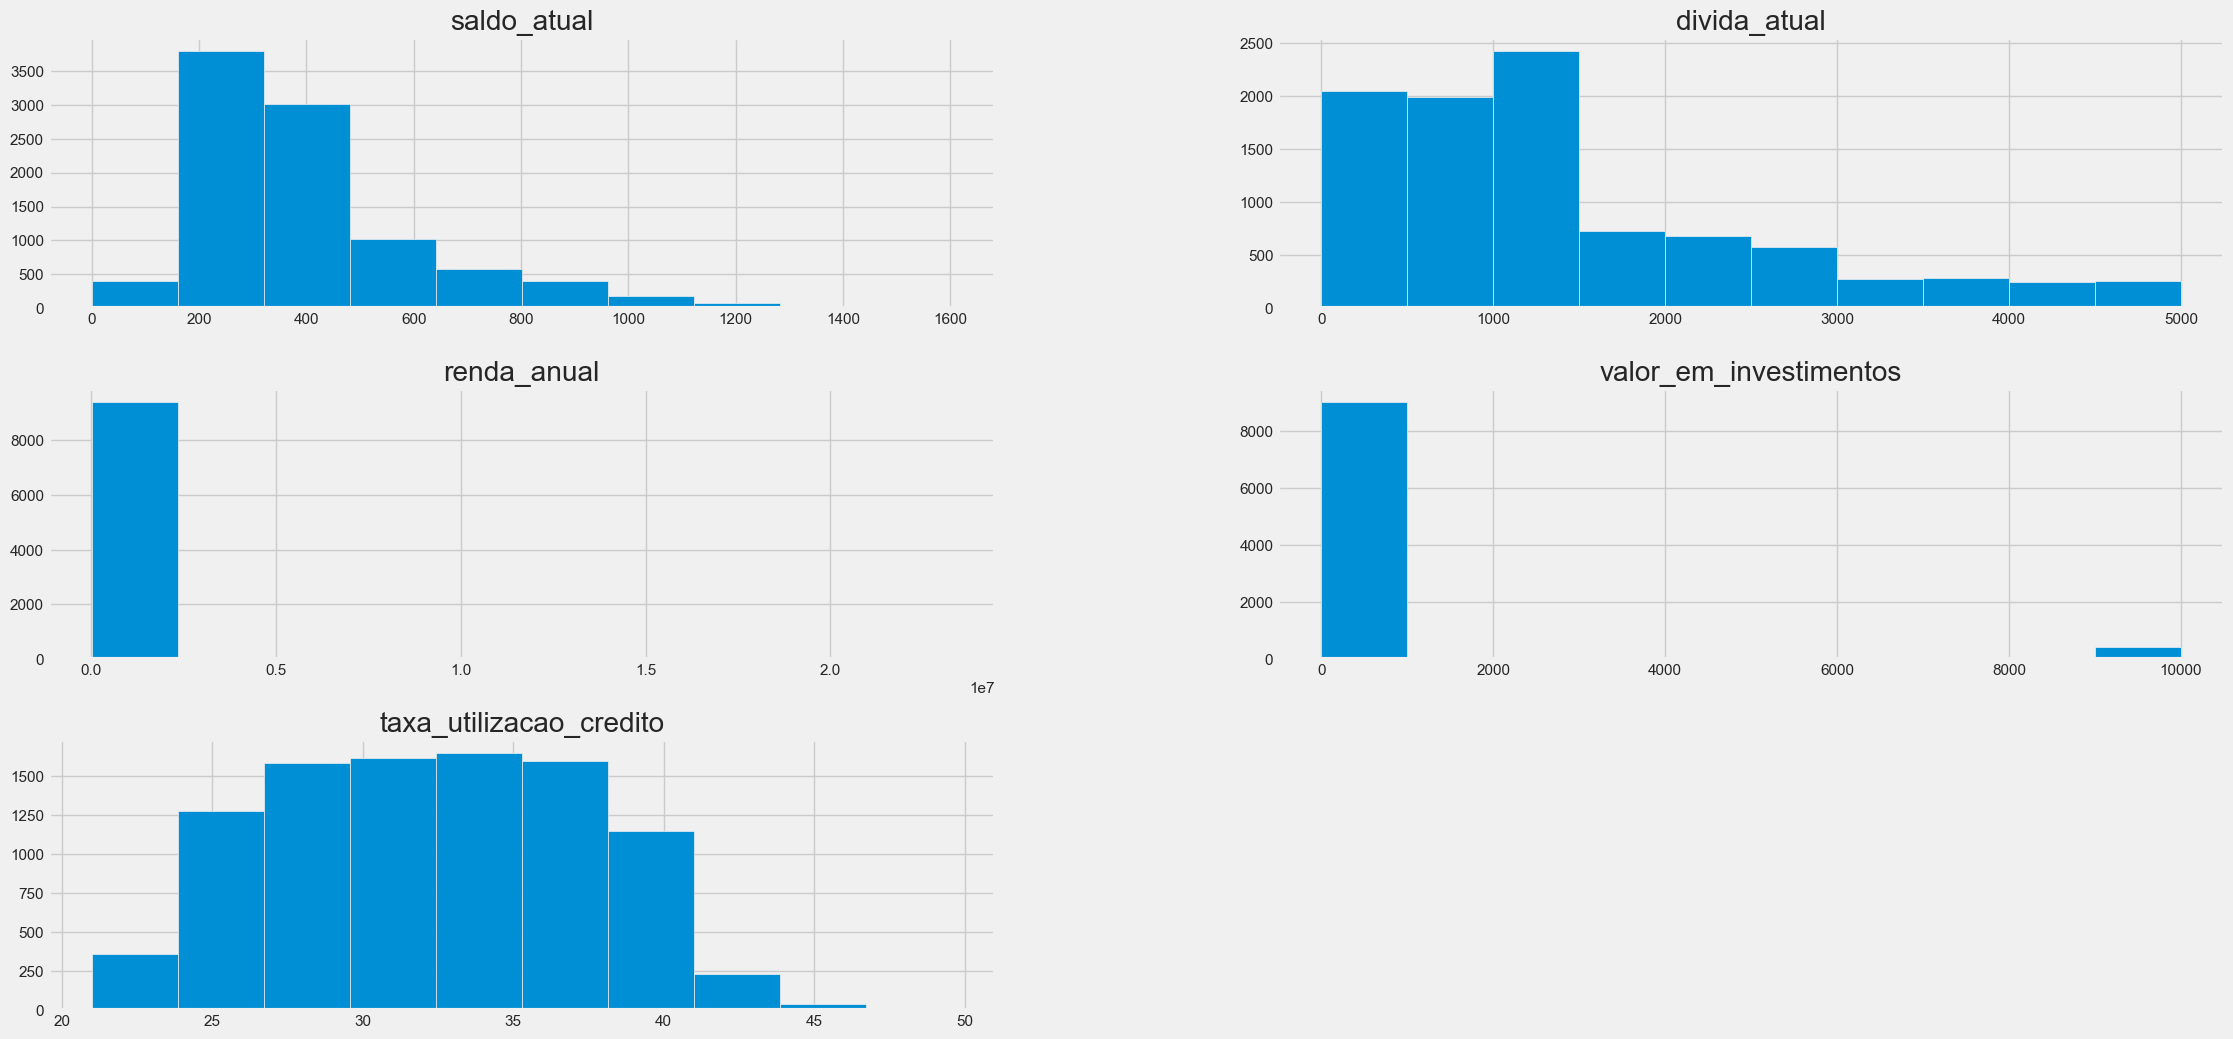

In [7]:
df[numerical_cols].hist();

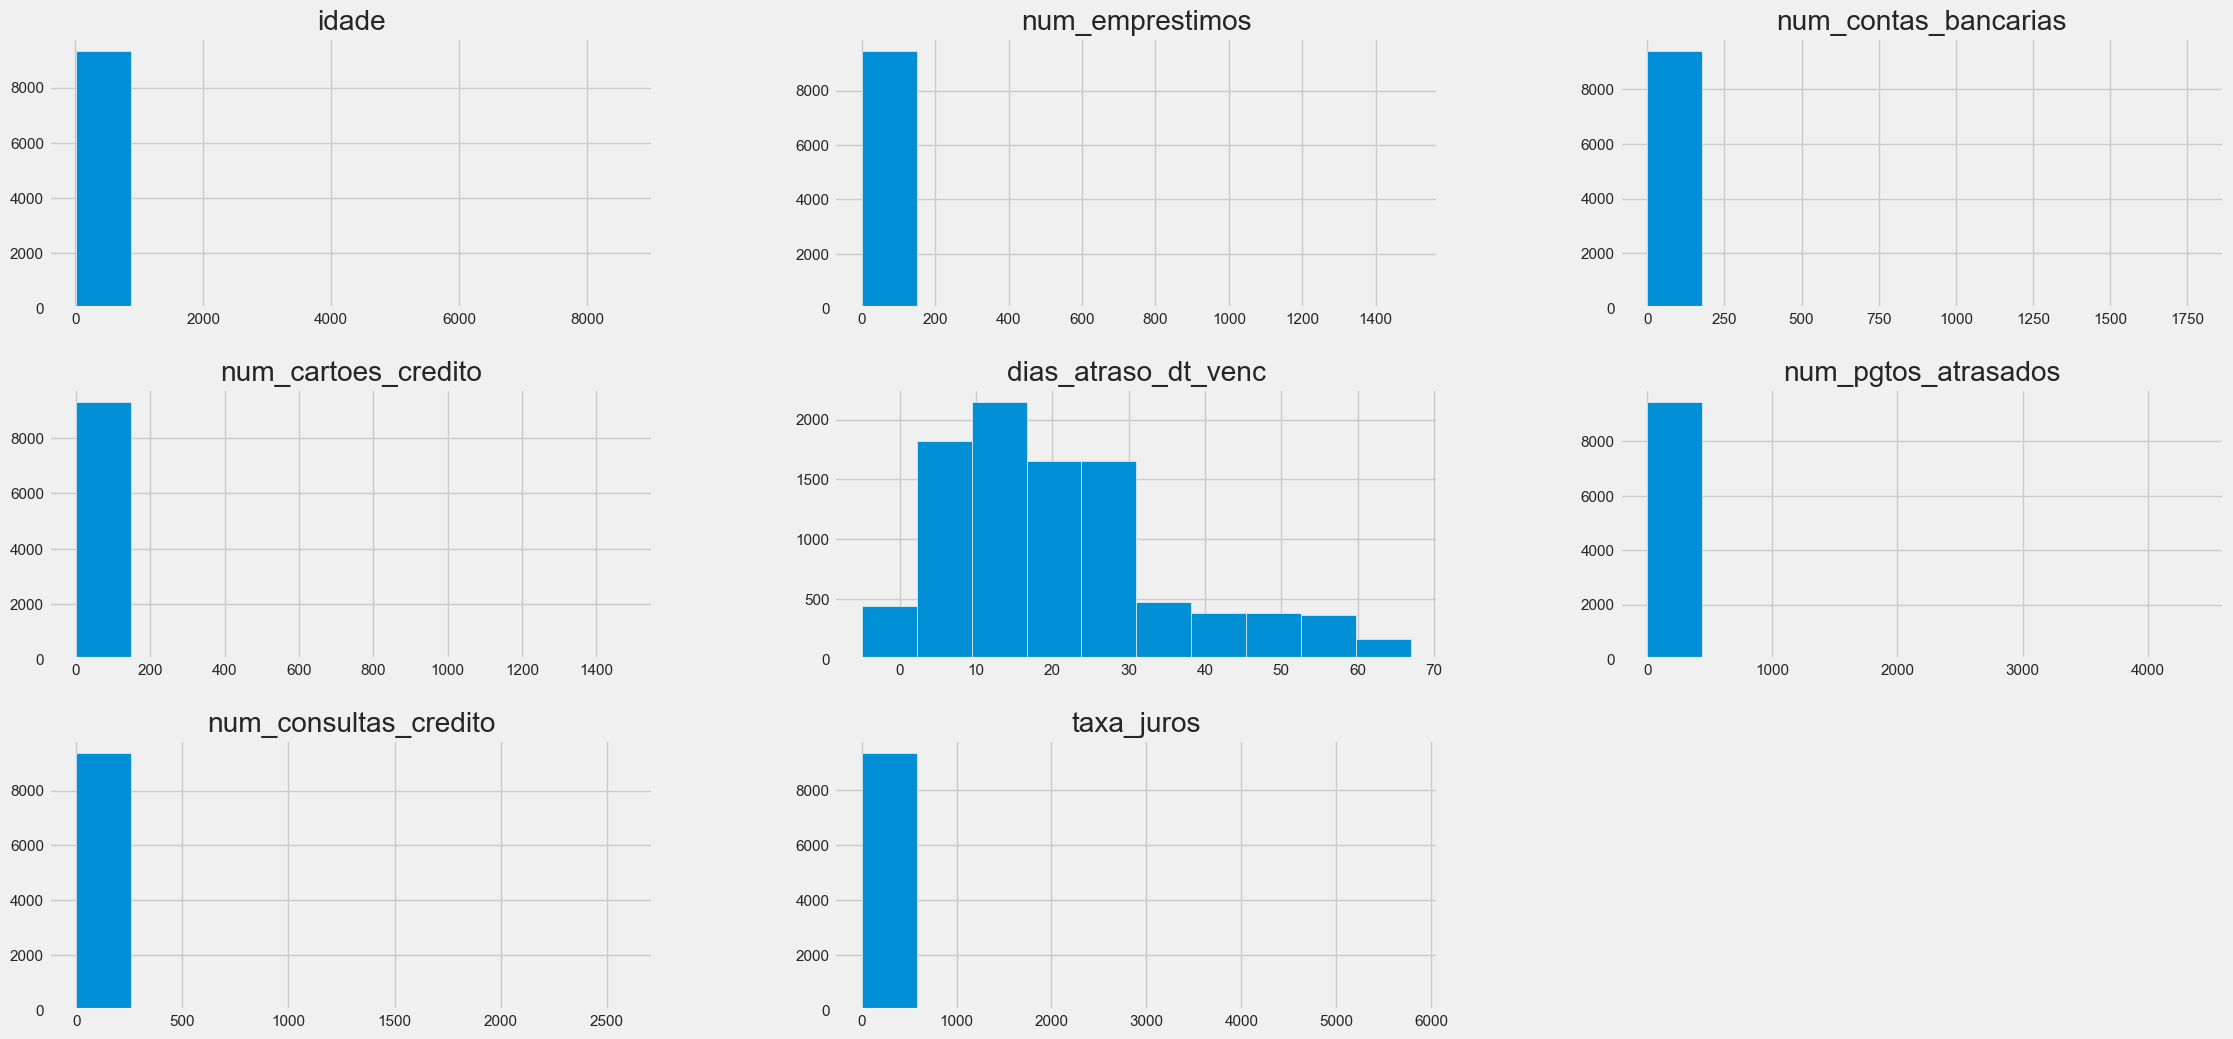

In [8]:
df[int_cols].hist();

Podemos observar que algumas feições possuem histogramas estranhos, como se fossem feições binárias ou tivessem uma grande concentração em um único valor. Precisamos aumentar o zoom para verificá-los.

### Distribution of 'Renda Anual'

Vamos verificar nosso primeiro recurso com um estranho histograma, "renda_anual".

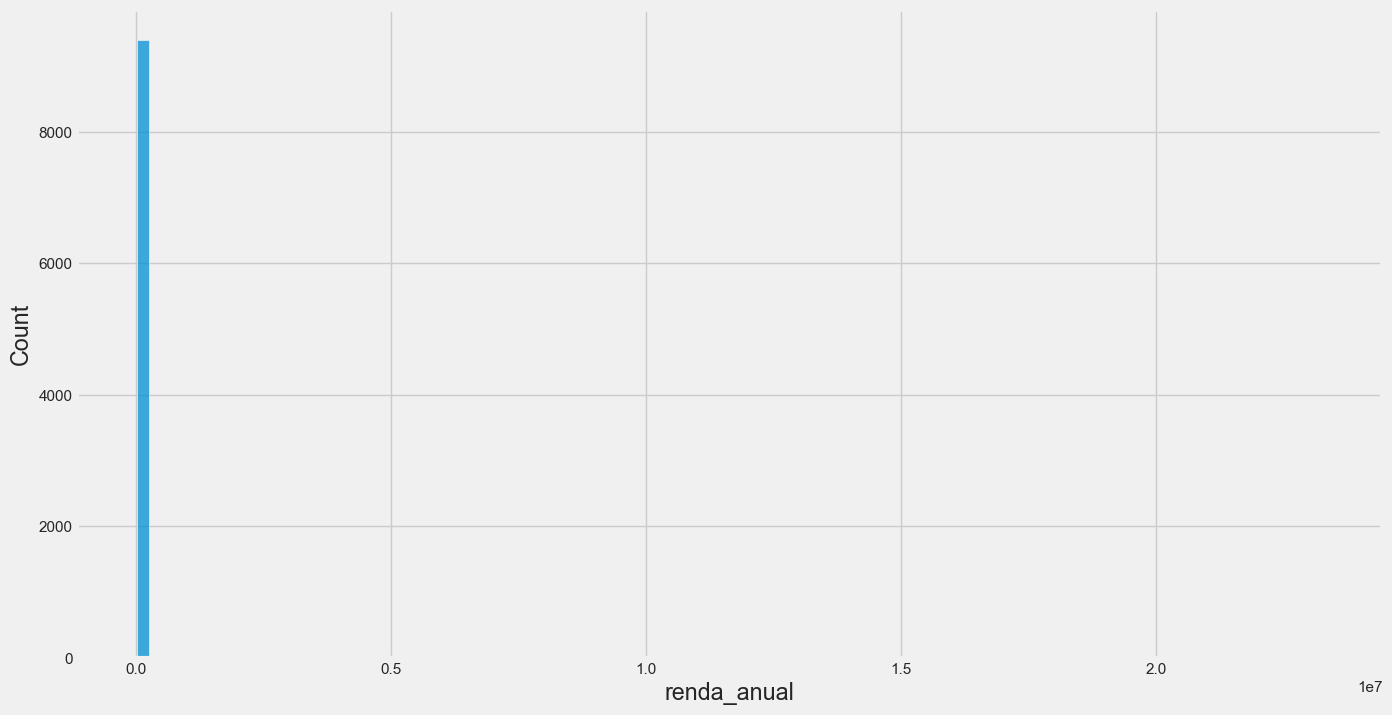

In [9]:
plt.figure(figsize=(15, 8))
sns.histplot(df.renda_anual, bins=100,kde=False)
plt.show()

Se ampliarmos o pico, veremos que existem muitos valores entre 0 e 0,1e6 (100_000). É algo parecido com o que acontece na [American Express Competition](aggle.com/competitions/amex-default-prediction), onde foram injetados ruídos aleatórios

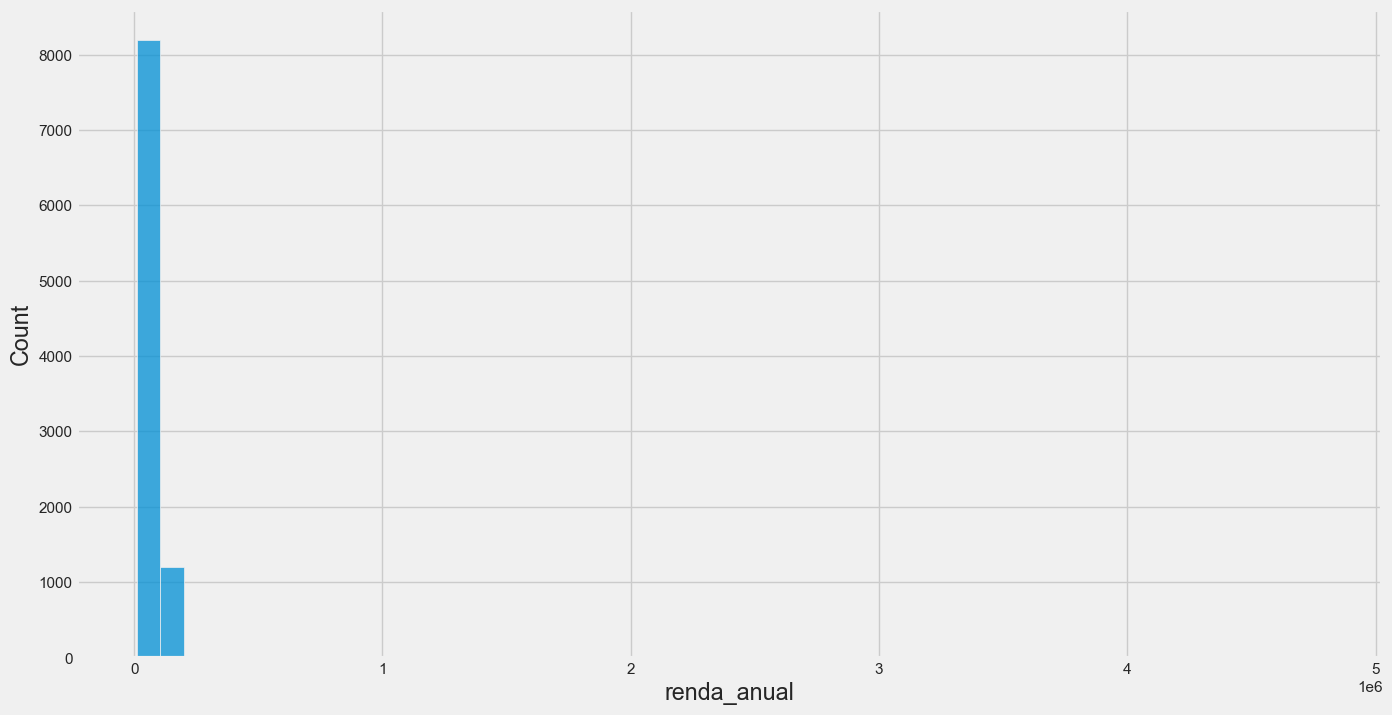

In [10]:
plt.figure(figsize=(15, 8))
sns.histplot(df.loc[df.renda_anual<0.5e7,'renda_anual'], bins=50,kde=False)
plt.show()

Se recortarmos a média da distribuição, observaremos uma forma diferente acima e abaixo dela.

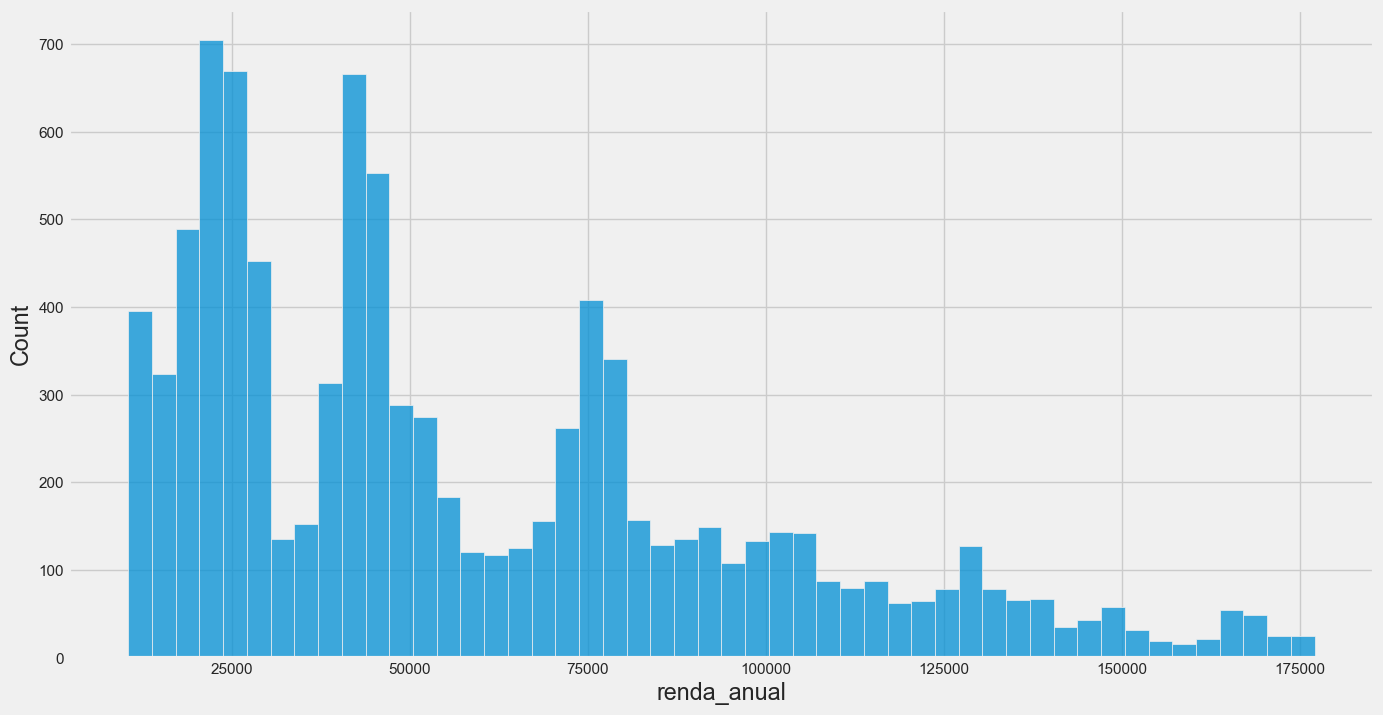

In [11]:
plt.figure(figsize=(15, 8))
sns.histplot(df.loc[(df.renda_anual < df.renda_anual.mean()),'renda_anual'], bins=50,kde=False)
plt.show()

<Figure size 1200x1000 with 0 Axes>

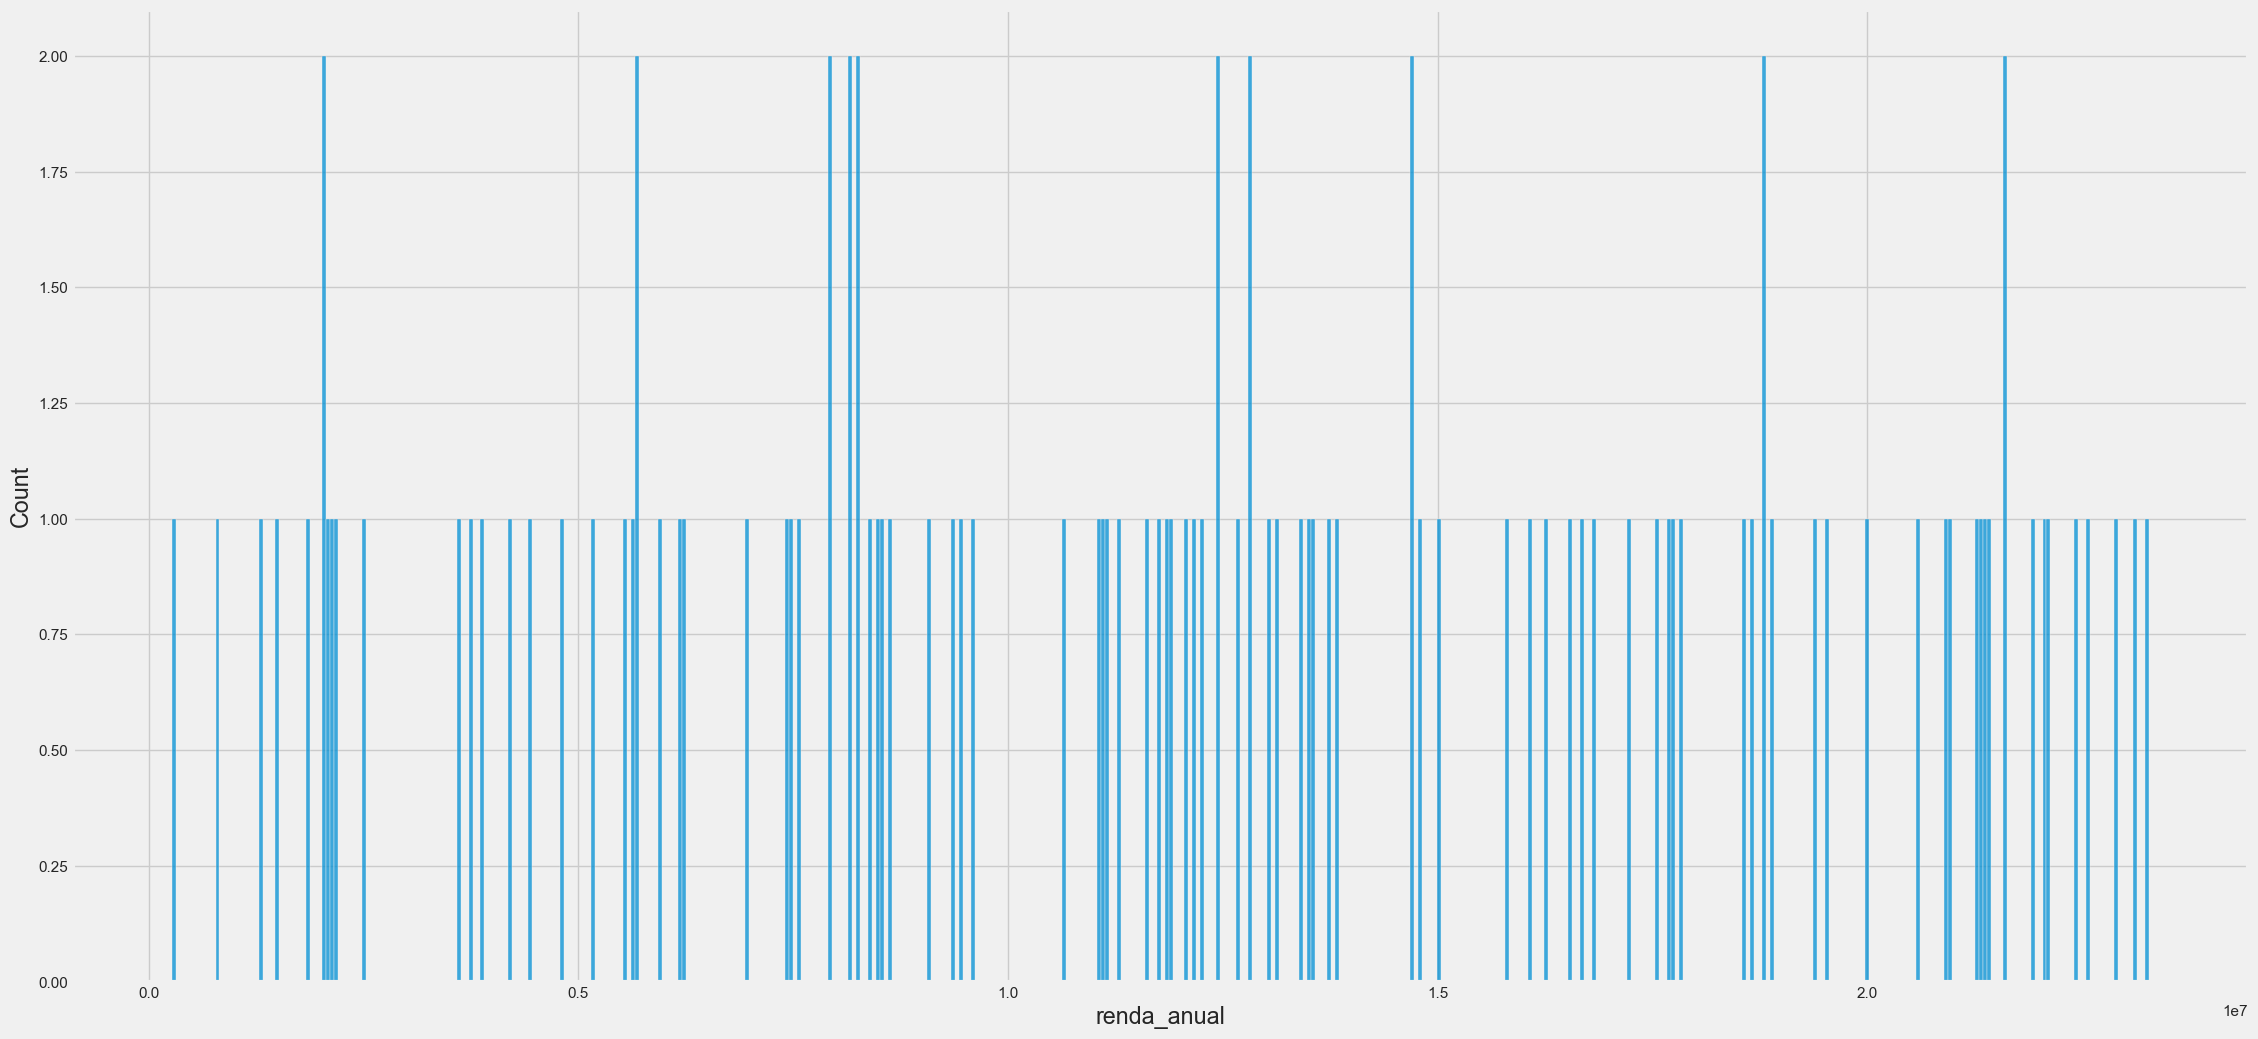

In [12]:
plt.figure(figsize=(12, 10))
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax = sns.histplot(df.loc[(df.renda_anual > df.renda_anual.mean()),'renda_anual'], bins=500,kde=False)
plt.show()

### Distribution of 'Valor_em_investimentos'

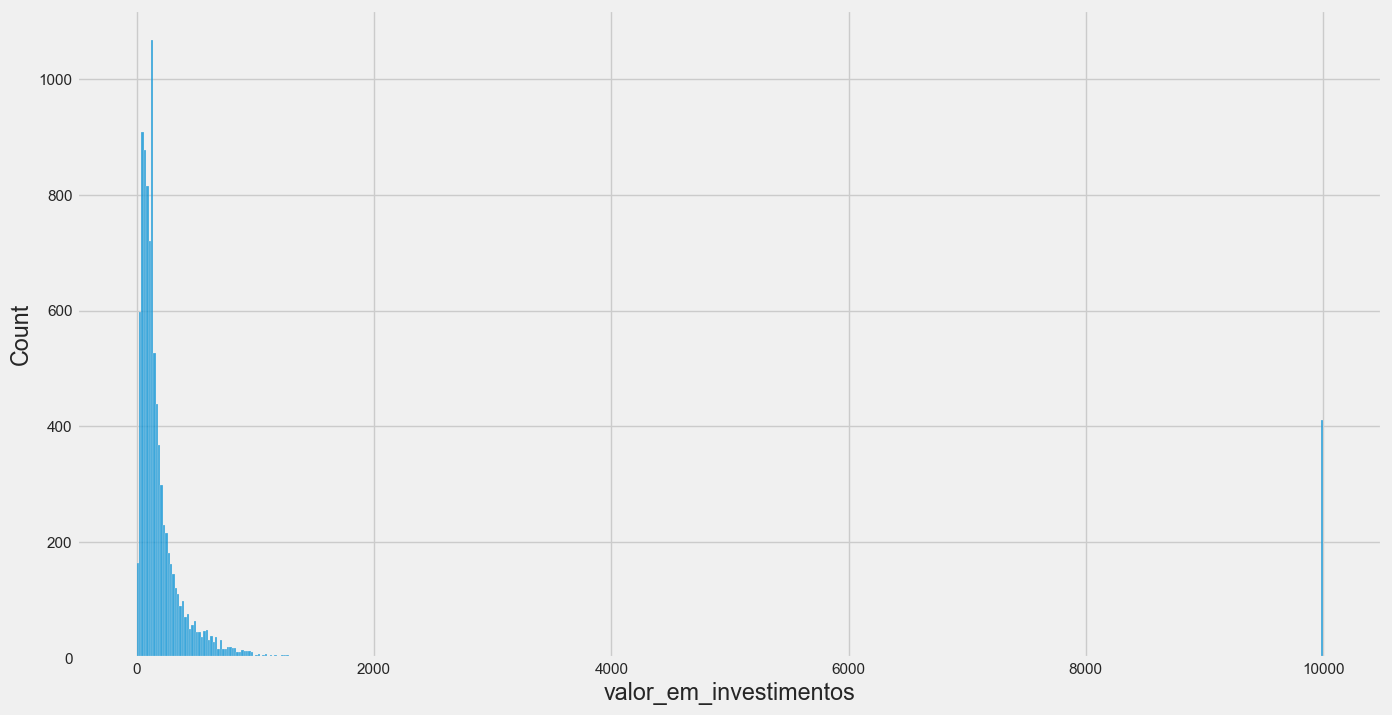

In [13]:
plt.figure(figsize=(15, 8))
sns.histplot(df.valor_em_investimentos, bins=500,kde=False)
plt.show()

<Figure size 1500x1000 with 0 Axes>

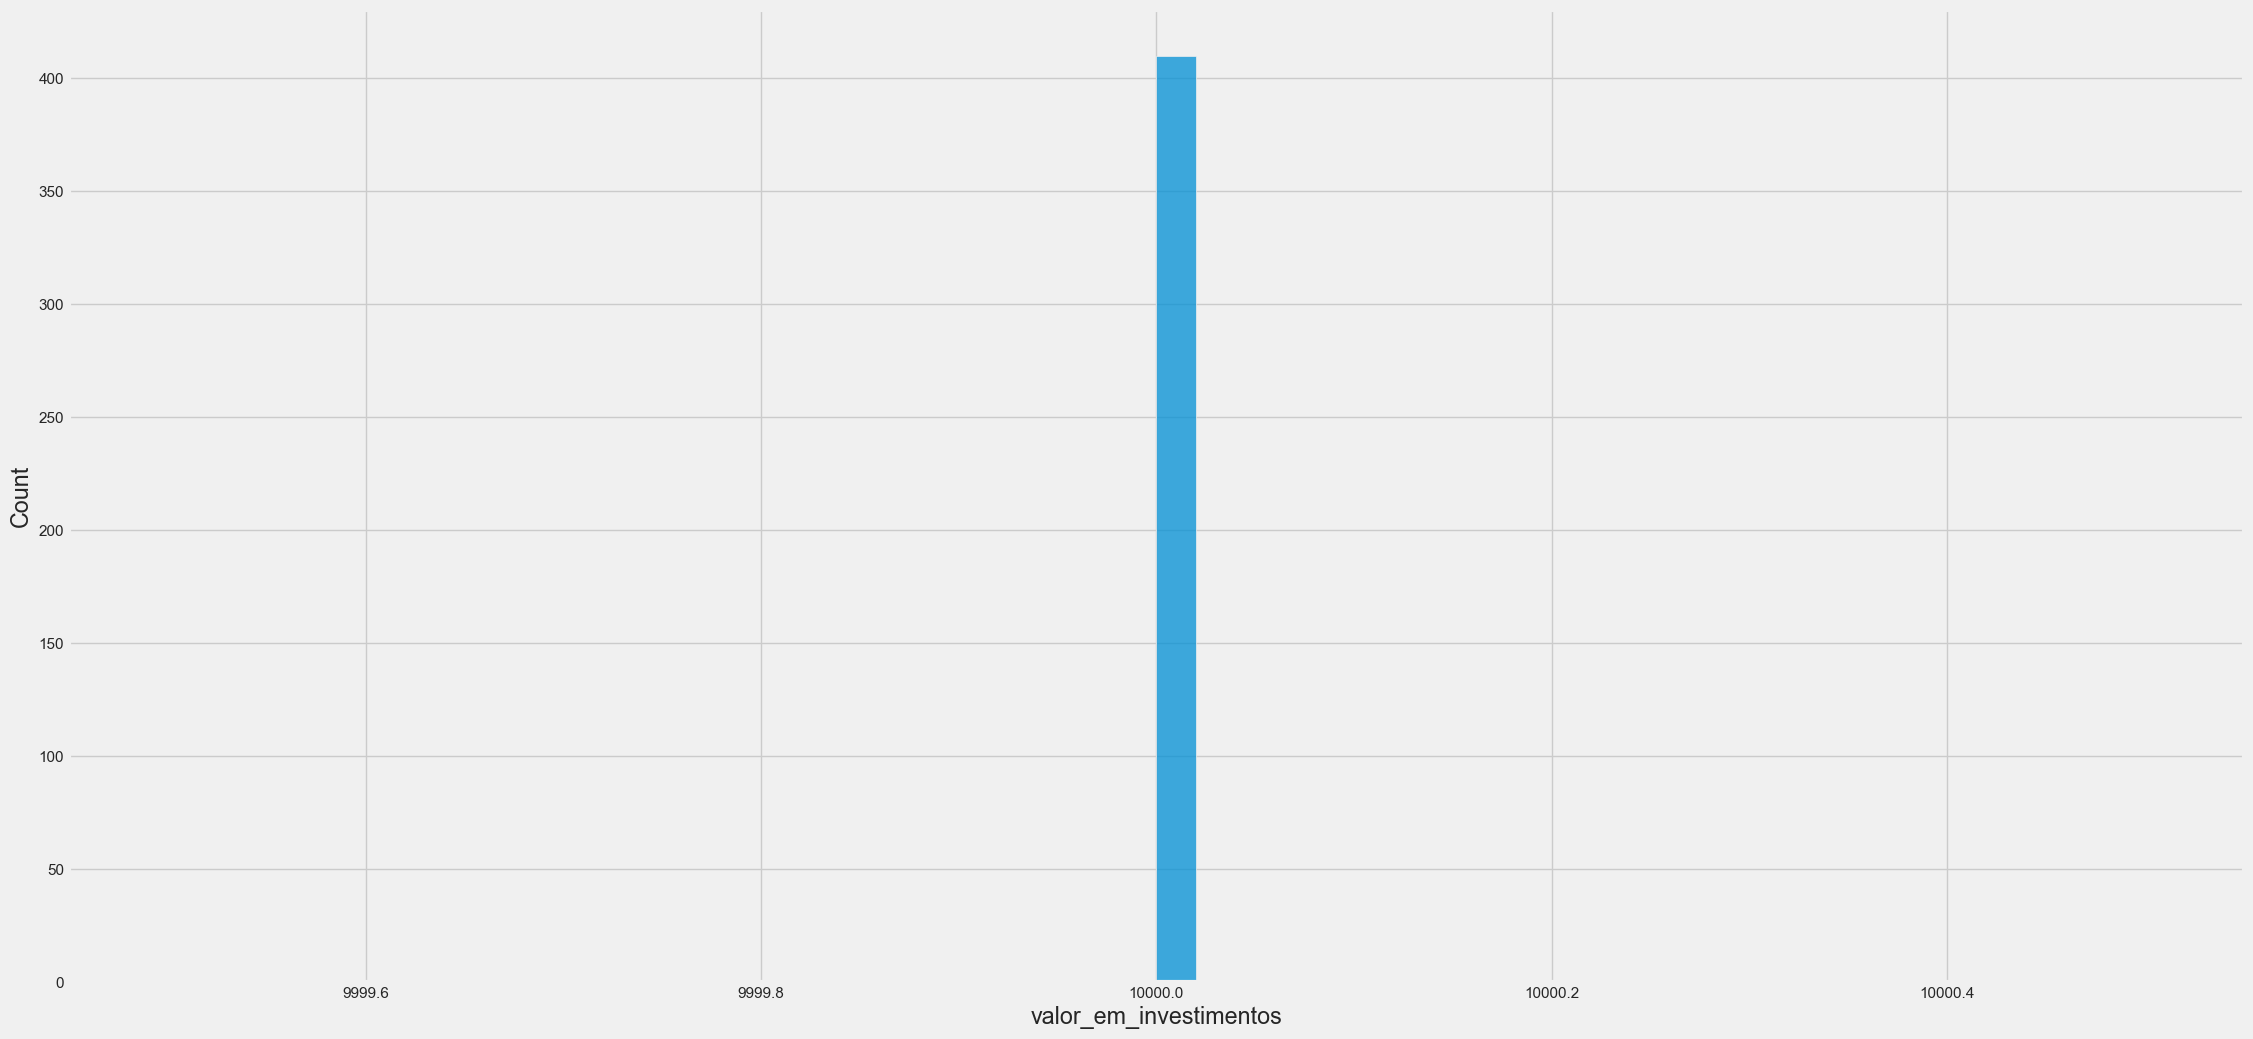

In [14]:
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax = sns.histplot(df.loc[df.valor_em_investimentos == 10_000,'valor_em_investimentos'], bins=50,kde=False)
plt.show()

In [15]:
df.loc[df.valor_em_investimentos == 10_000, 'valor_em_investimentos'].shape

(410,)

Temos 410 valores de '10_000'! Provavelmente injetado aleatoriamente.

In [16]:
aux_vei = df.loc[df.valor_em_investimentos != 10_000]

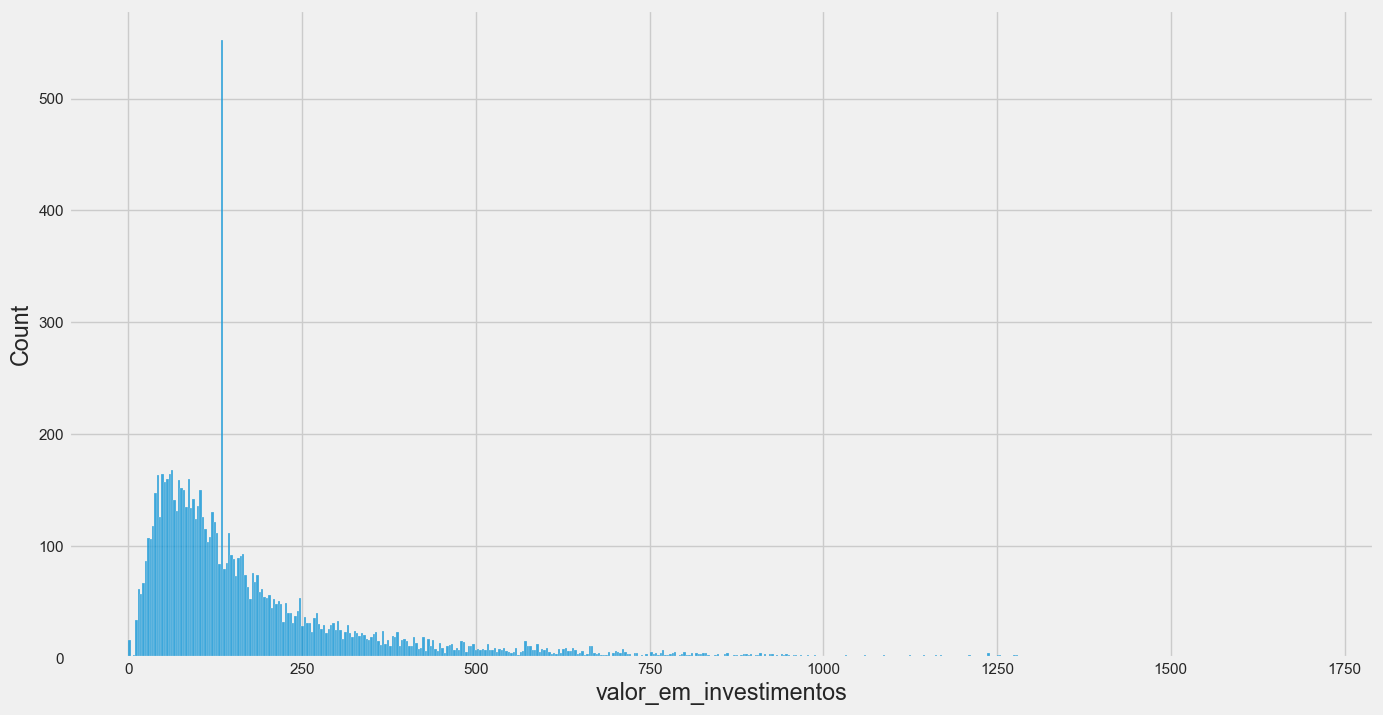

In [17]:
plt.figure(figsize=(15, 8))
sns.histplot(aux_vei.valor_em_investimentos, bins=500,kde=False)
plt.show()

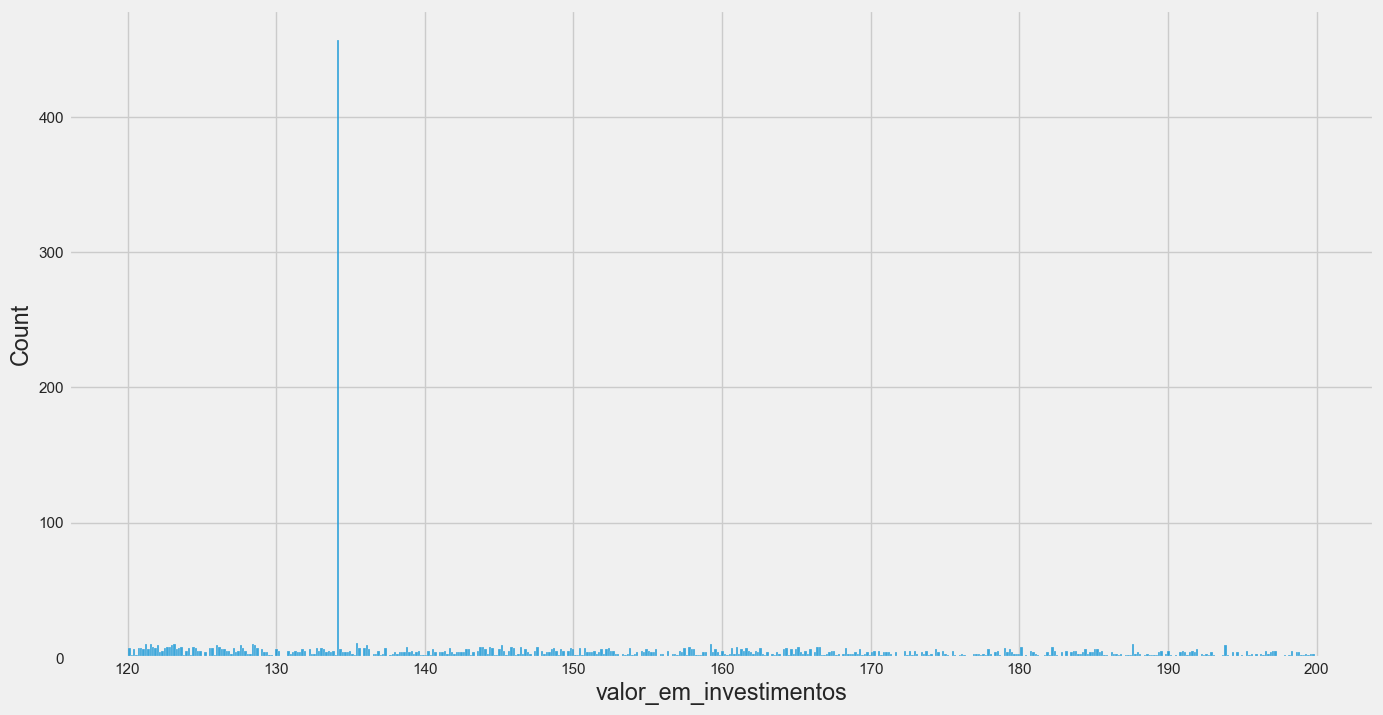

In [18]:
plt.figure(figsize=(15, 8))
sns.histplot(aux_vei.loc[(aux_vei.valor_em_investimentos > 120) & (aux_vei.valor_em_investimentos < 200), 'valor_em_investimentos'], bins=500,kde=False)
plt.show()

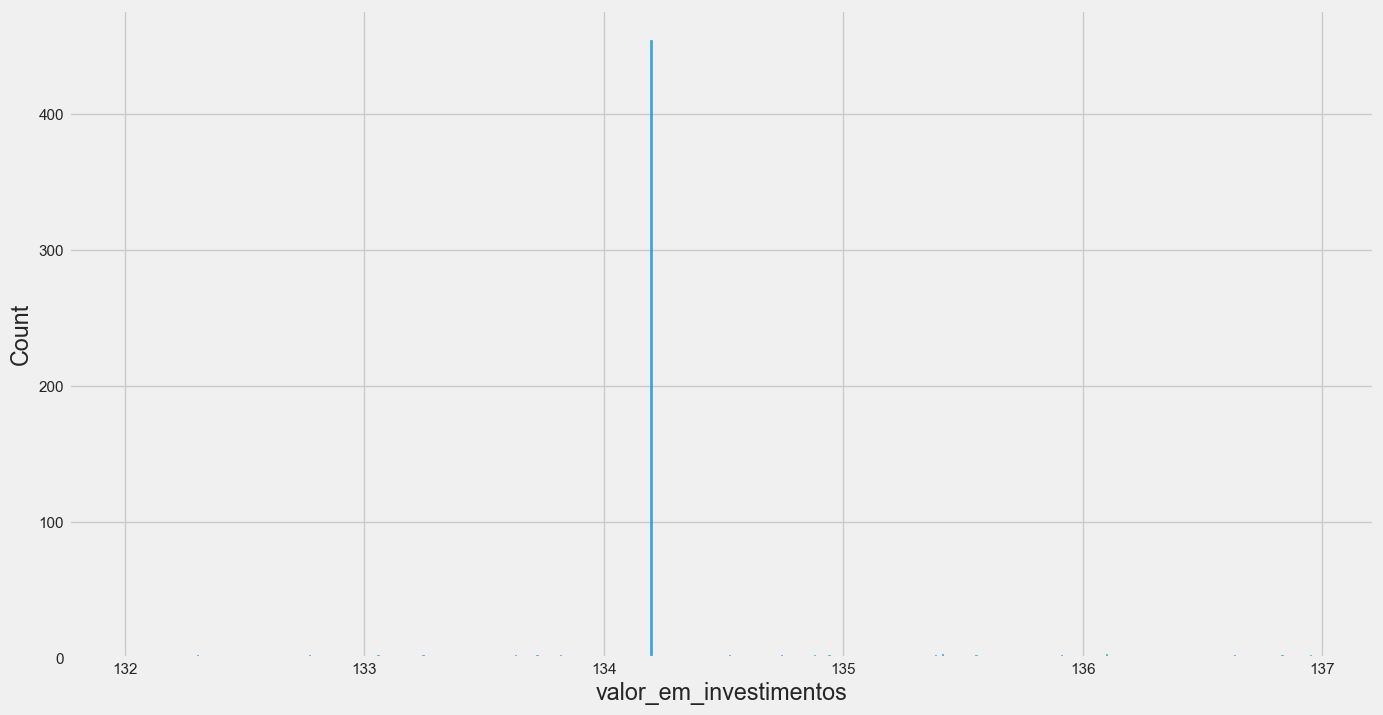

In [19]:
plt.figure(figsize=(15, 8))
sns.histplot(aux_vei.loc[(aux_vei.valor_em_investimentos > 132) & (aux_vei.valor_em_investimentos < 137), 'valor_em_investimentos'], bins=500,kde=False)
plt.show()

## Descriptive Integer Cols Stats

Como as `colunas int` são números discretos, é mais fácil restringi-las posteriormente no tratamento de valores discrepantes.

### NUM_EMPRESTIMOS

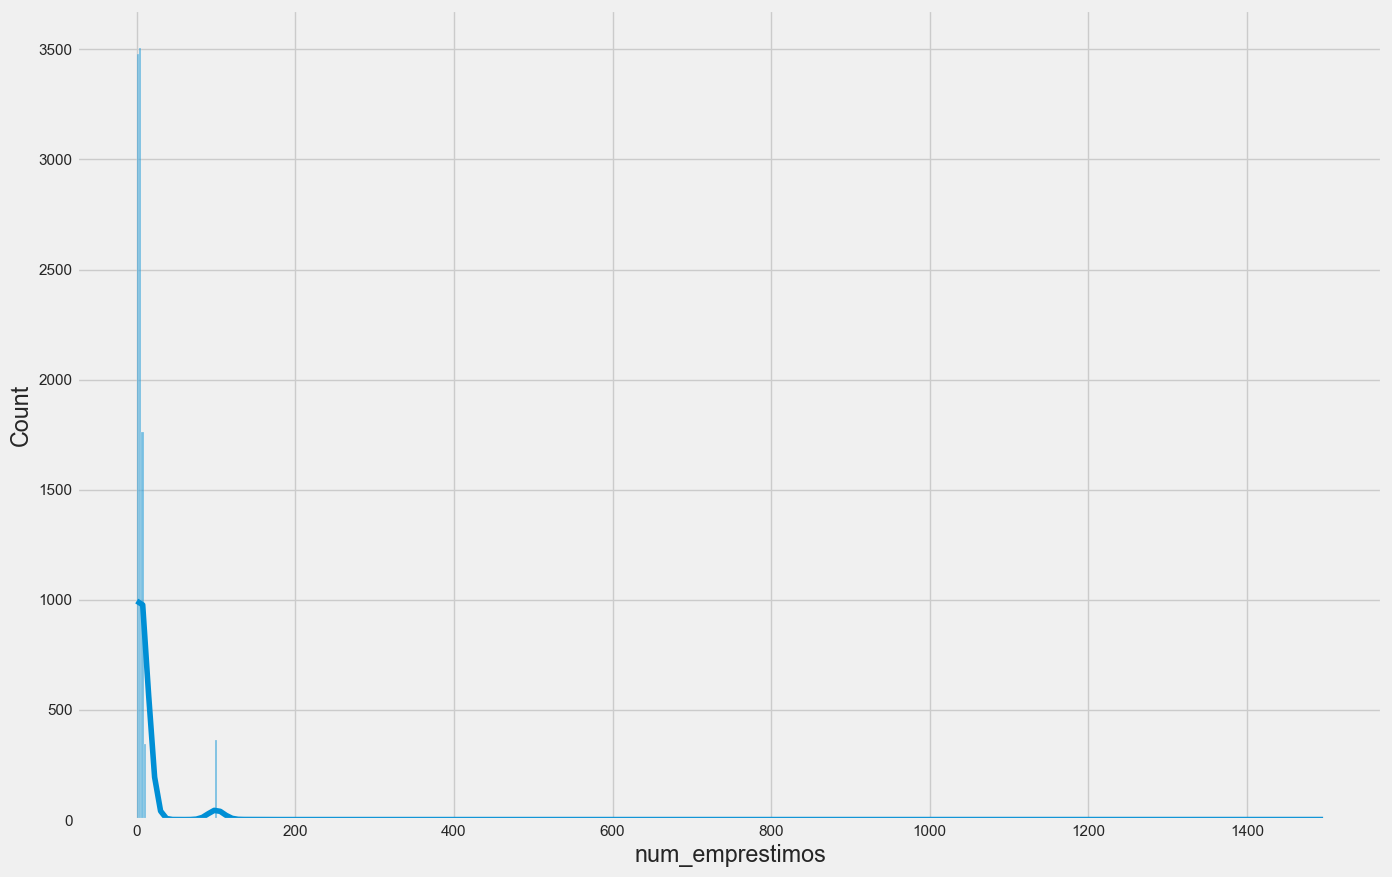

In [20]:
plt.figure(figsize=(15, 10))
sns.histplot(df['num_emprestimos'], bins=500, kde=True);

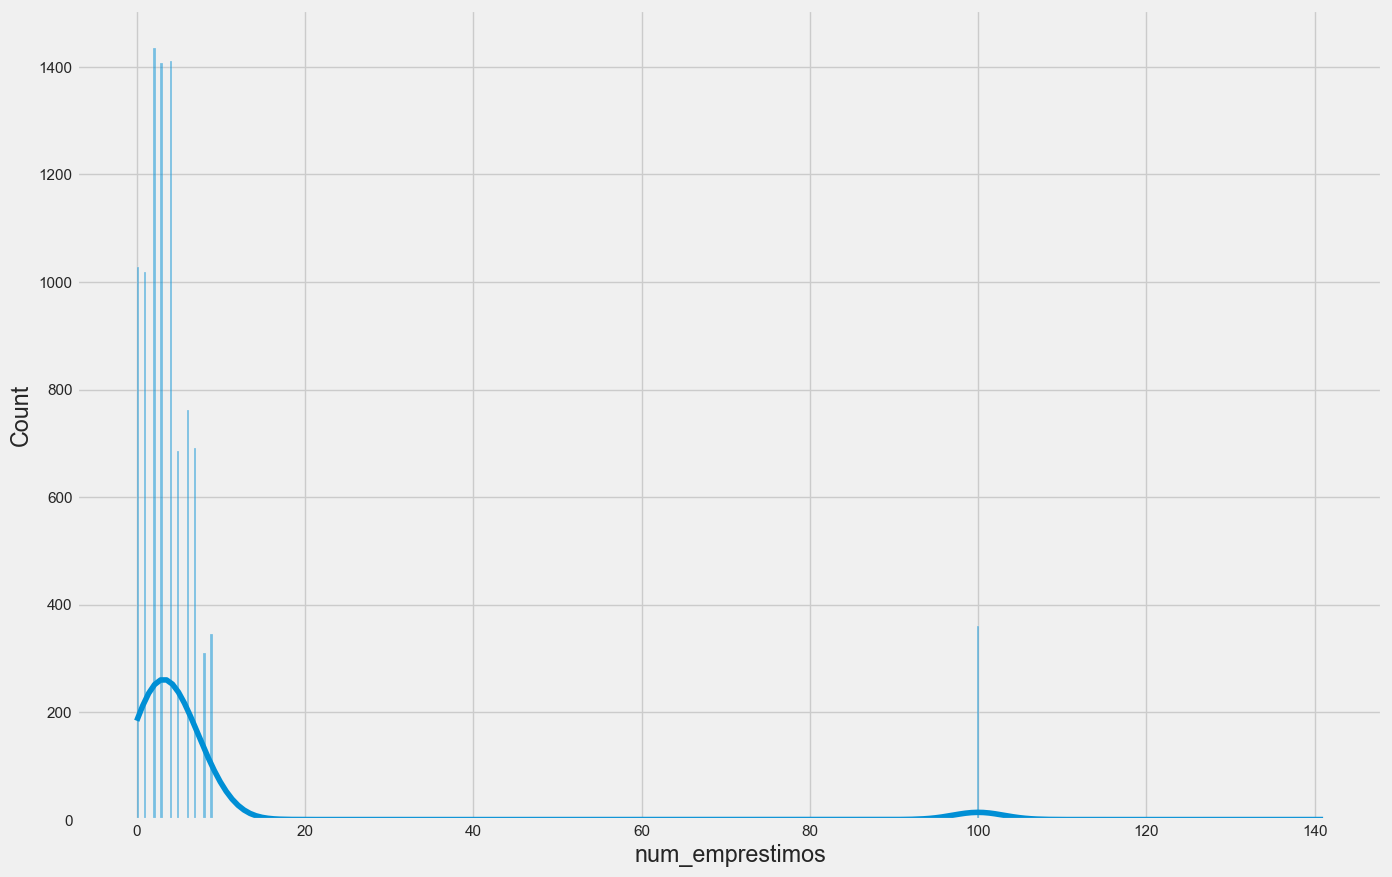

In [21]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[df['num_emprestimos']< 200, 'num_emprestimos'], bins=500, kde=True);

In [22]:
df.loc[df['num_emprestimos'] != 100, 'num_emprestimos'].shape

(9140,)

In [23]:
df.loc[df['num_emprestimos'] < 100, 'num_emprestimos'].shape

(9095,)

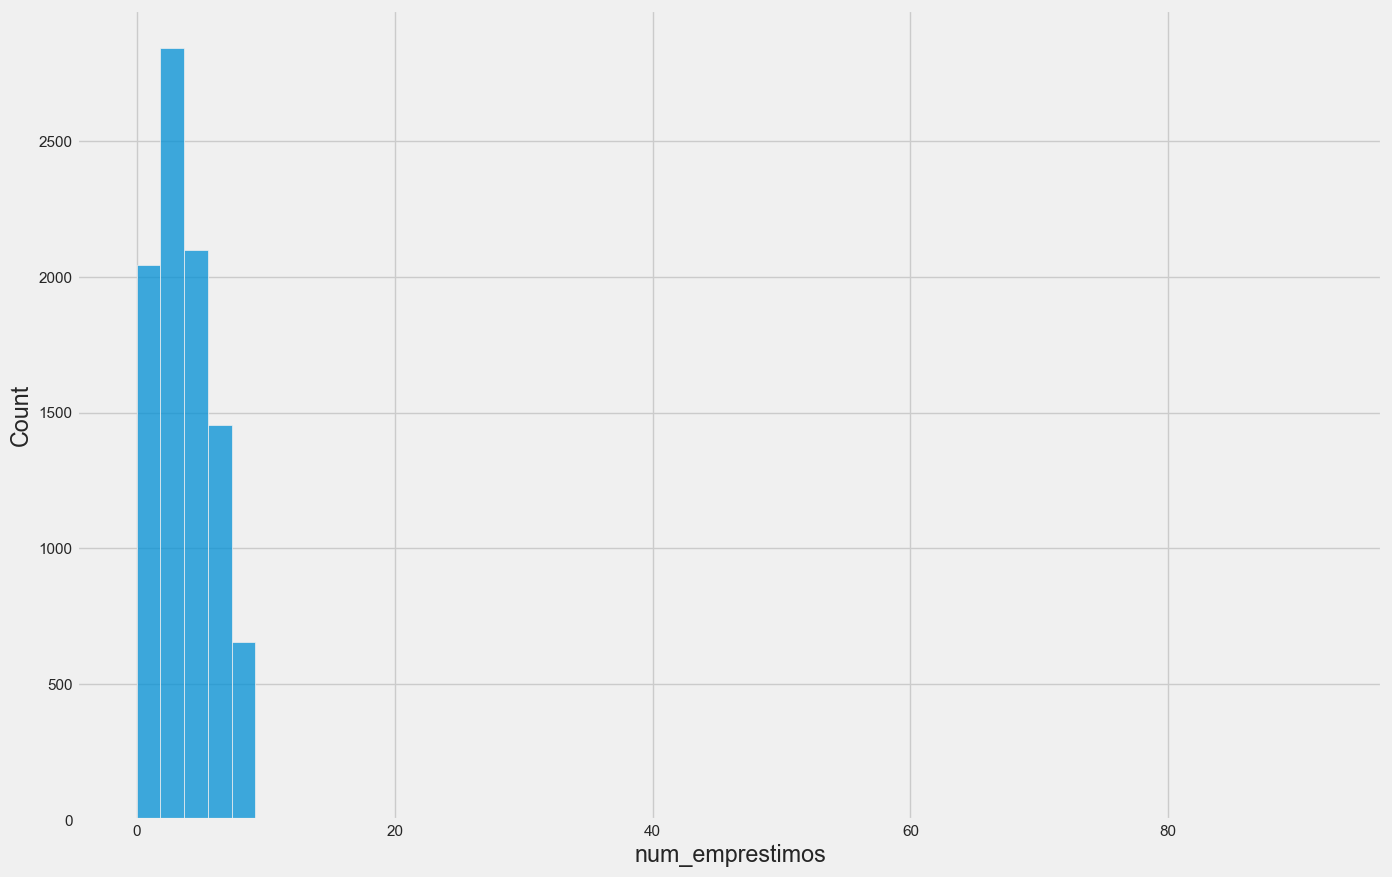

In [24]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[df['num_emprestimos'] < 100, 'num_emprestimos'], bins=50, kde=False);

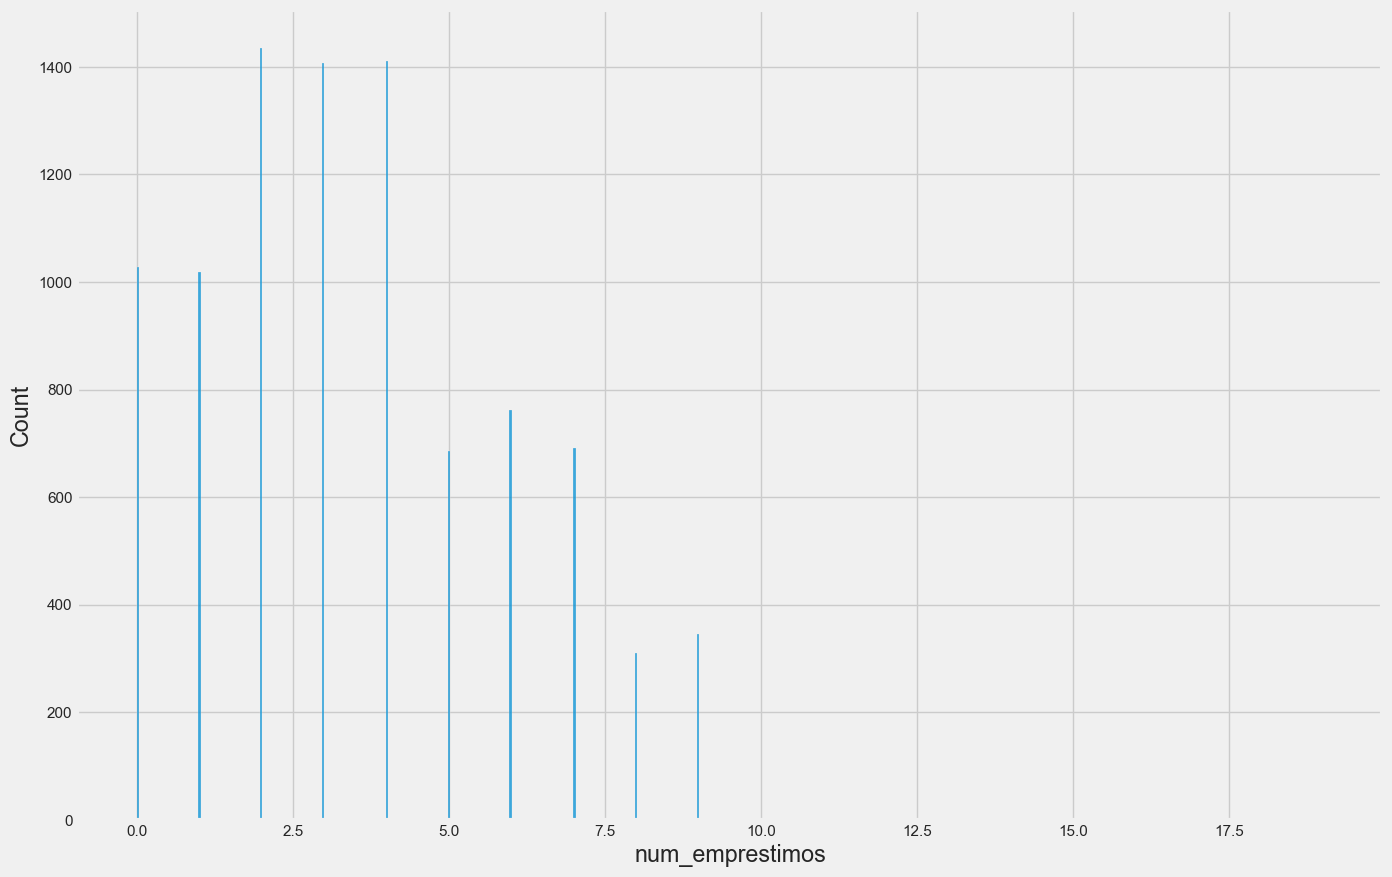

In [25]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[(df['num_emprestimos'] < 20), 'num_emprestimos'], bins=500, kde=False);

In [26]:
df.loc[(df['num_emprestimos'] < 100 , 'num_emprestimos')].median()

3.0

### NUM_CONTAS_BANCARIAS

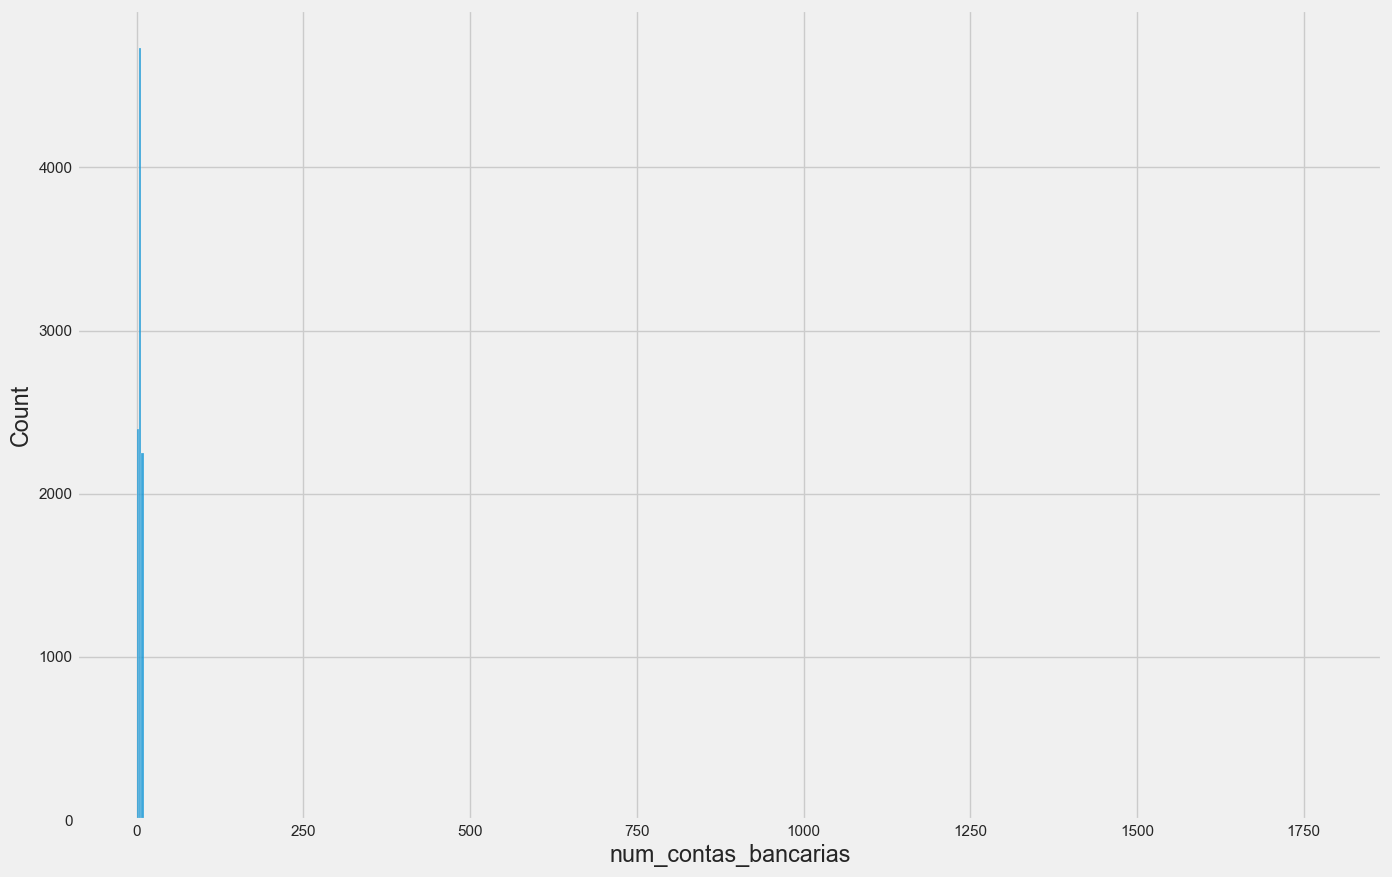

In [27]:
plt.figure(figsize=(15, 10))
sns.histplot(df['num_contas_bancarias'], bins=500, kde=False);

In [28]:
df.loc[(df['num_contas_bancarias'] > 9) & (df['num_contas_bancarias'] < 11), 'num_contas_bancarias'].shape

(503,)

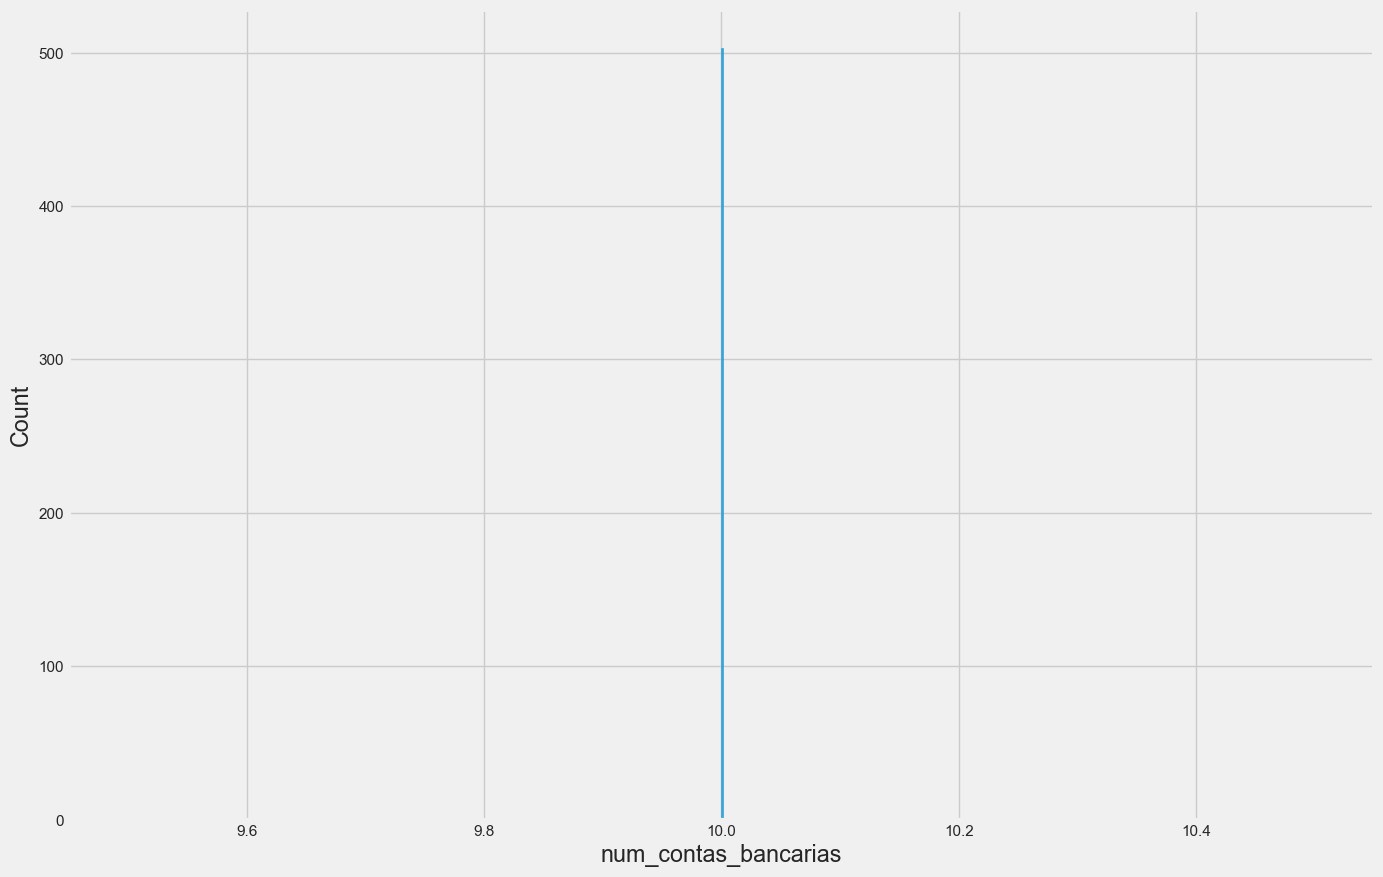

In [29]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[df['num_contas_bancarias'] == 10, 'num_contas_bancarias'], bins=500, kde=False);

In [30]:
df.loc[df['num_contas_bancarias'] < 11, 'num_contas_bancarias'].median()

6.0

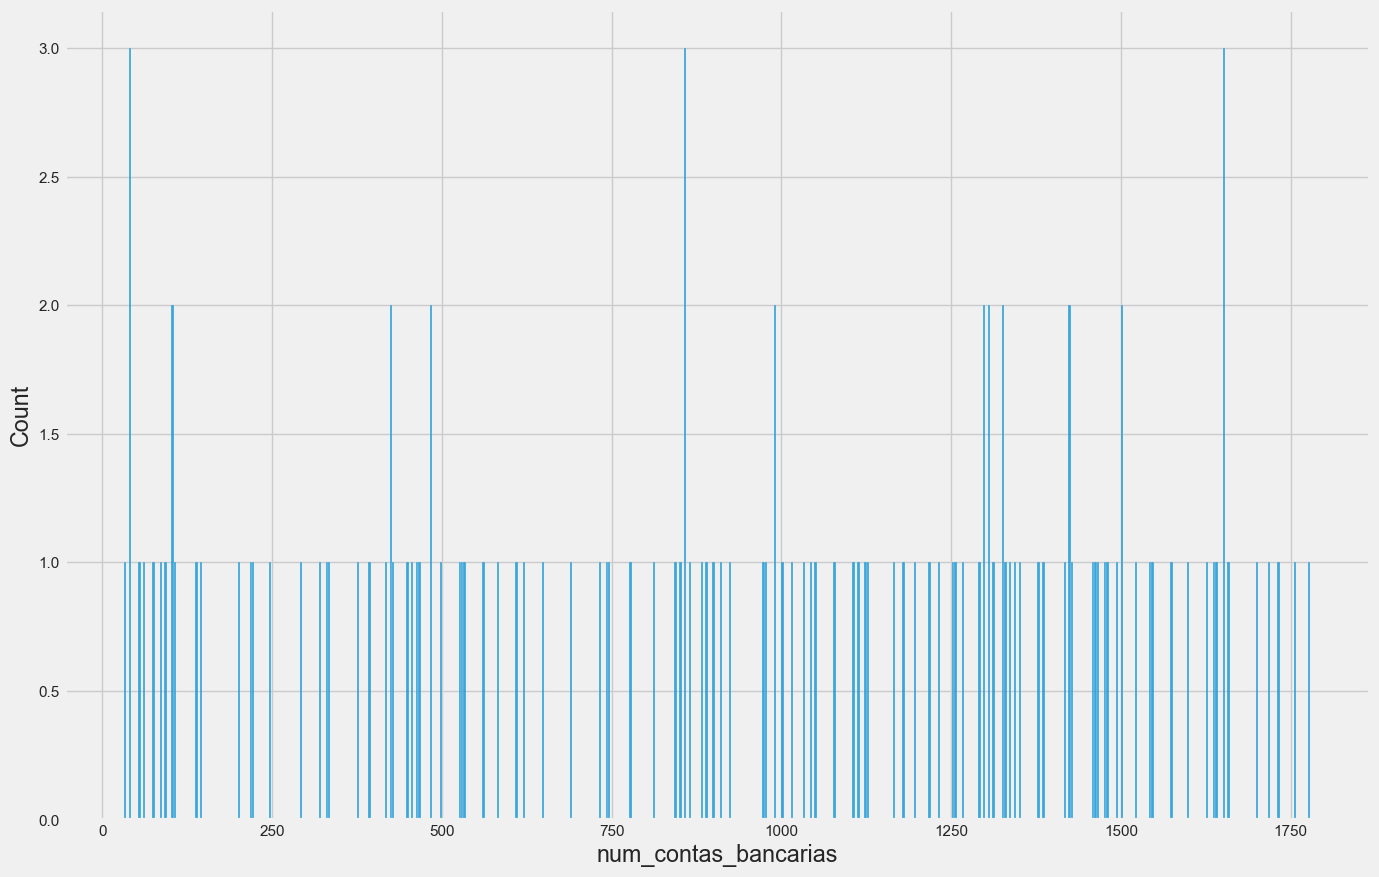

In [31]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[df['num_contas_bancarias'] > 10, 'num_contas_bancarias'], bins=500, kde=False);

### NUM_CARTOES_CREDITO

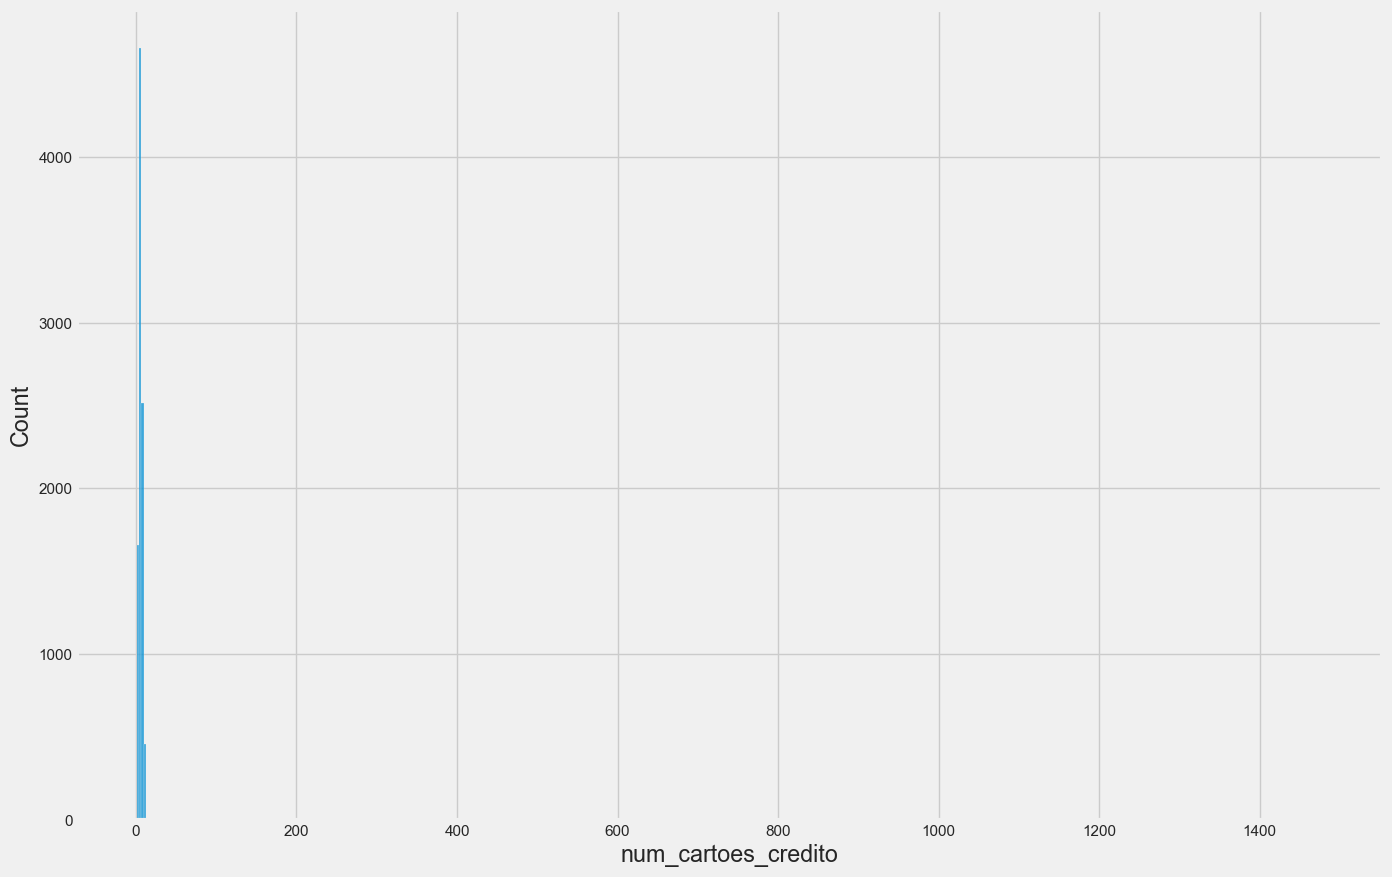

In [32]:
plt.figure(figsize=(15, 10))
sns.histplot(df['num_cartoes_credito'], bins=500, kde=False);

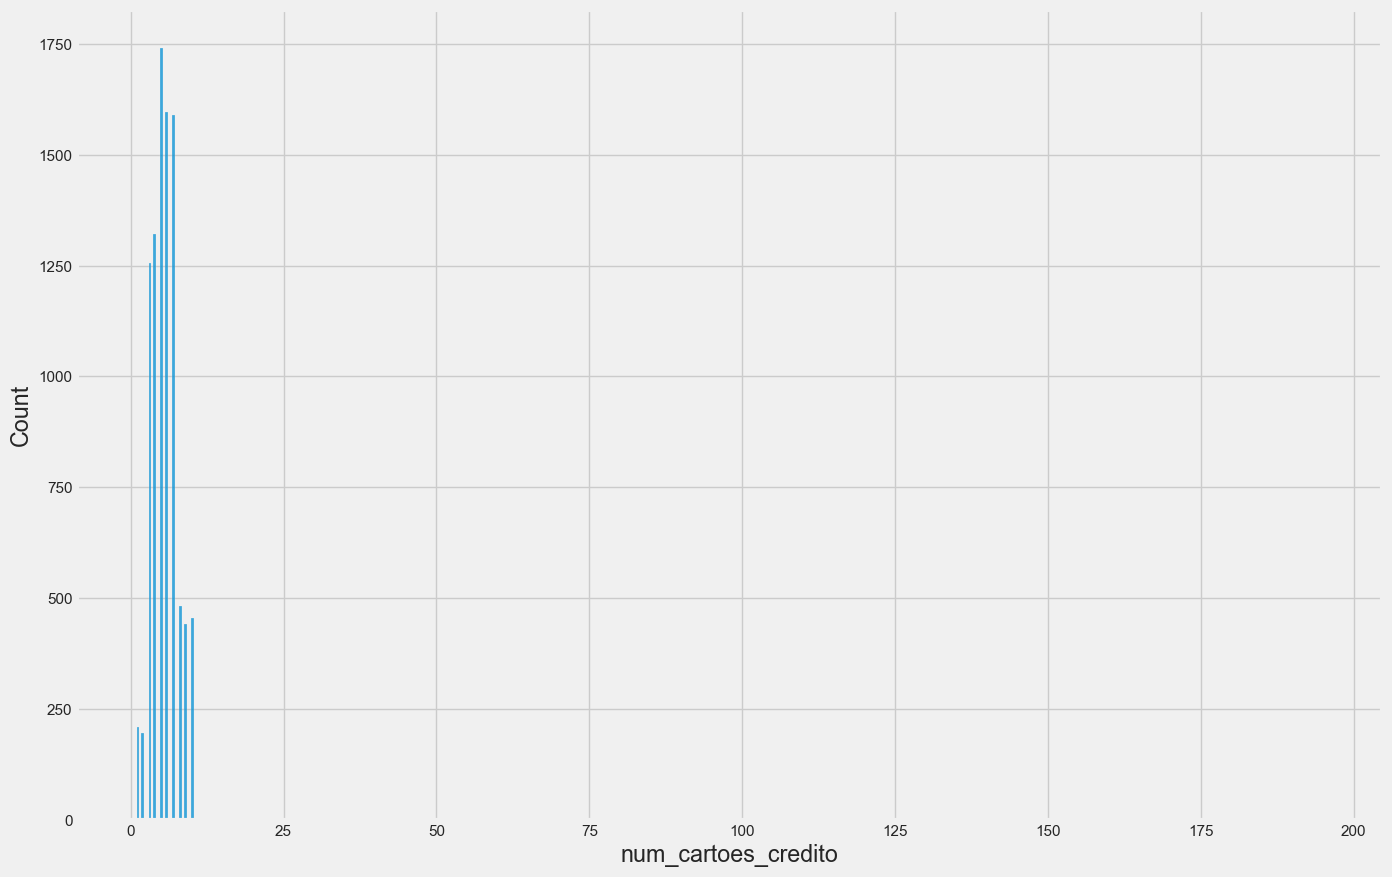

In [33]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[df['num_cartoes_credito'] < 200, 'num_cartoes_credito'], bins=500, kde=False);

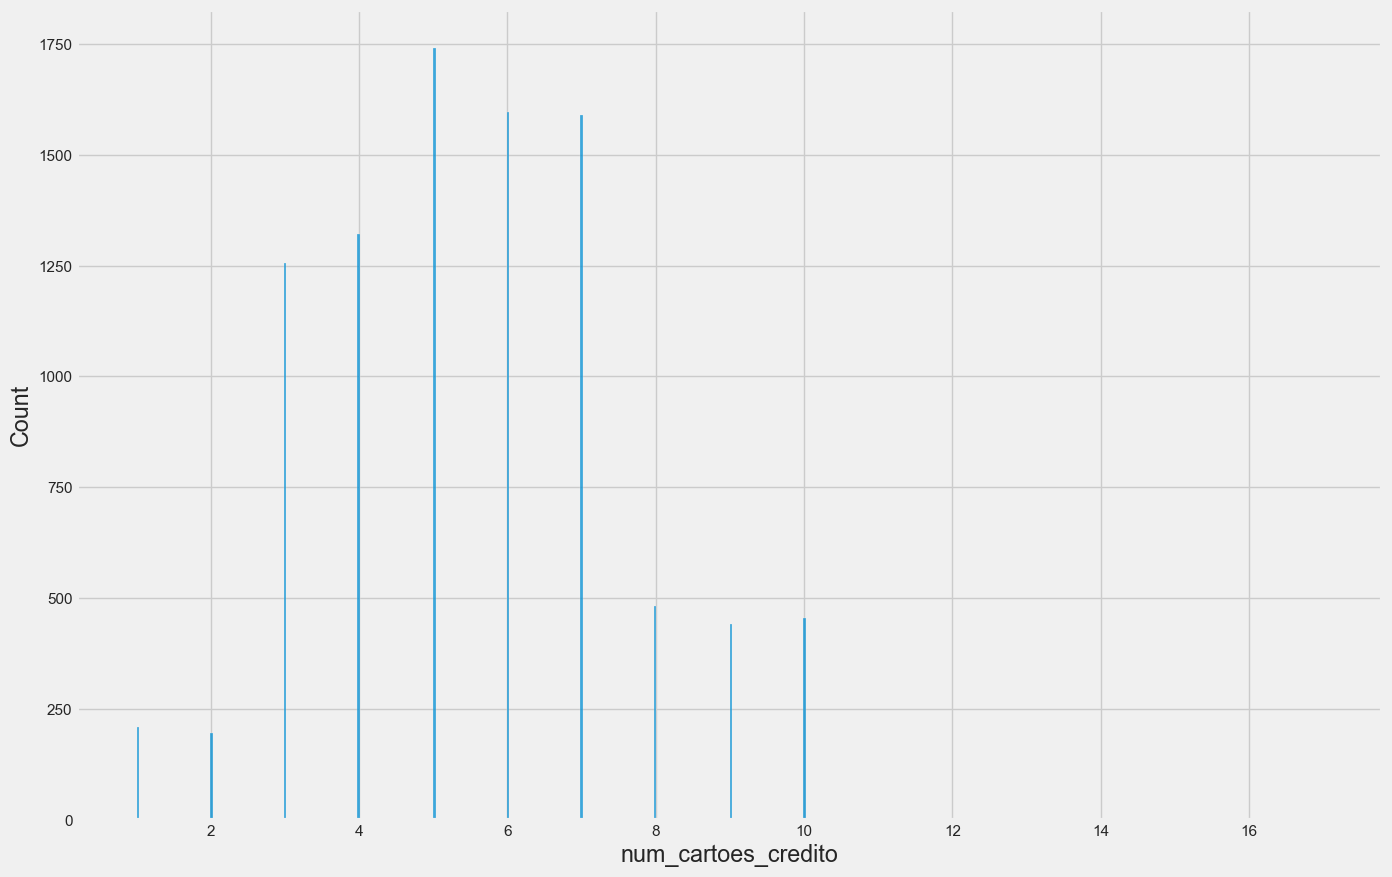

In [34]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[df['num_cartoes_credito'] < 25, 'num_cartoes_credito'], bins=500, kde=False);

In [35]:
df.loc[df['num_cartoes_credito'] < 11, 'num_cartoes_credito'].median()

5.0

### NUM_PGTOS_ATRASADOS

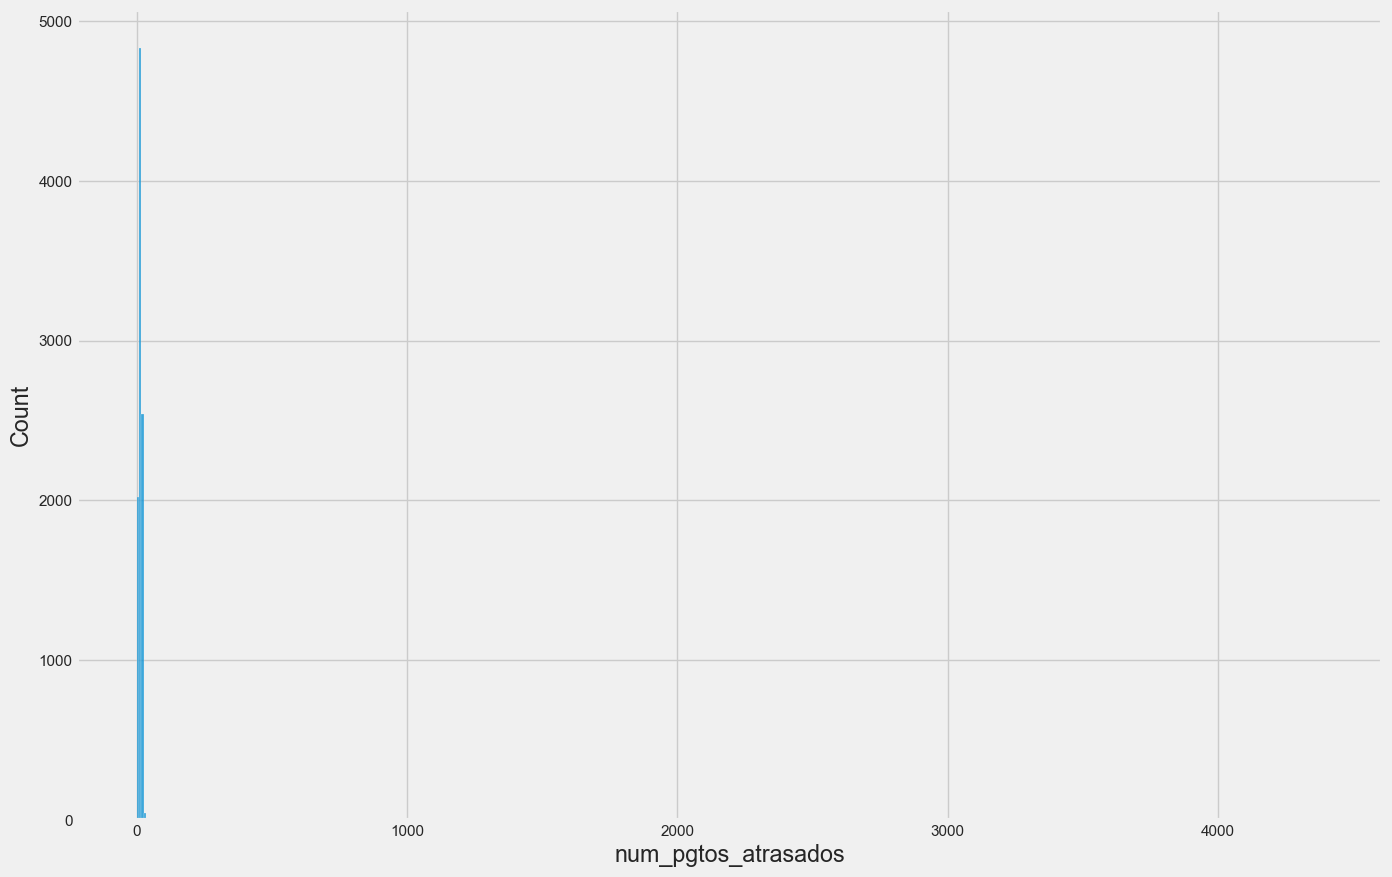

In [36]:
plt.figure(figsize=(15, 10))
sns.histplot(df['num_pgtos_atrasados'], bins=500, kde=False);

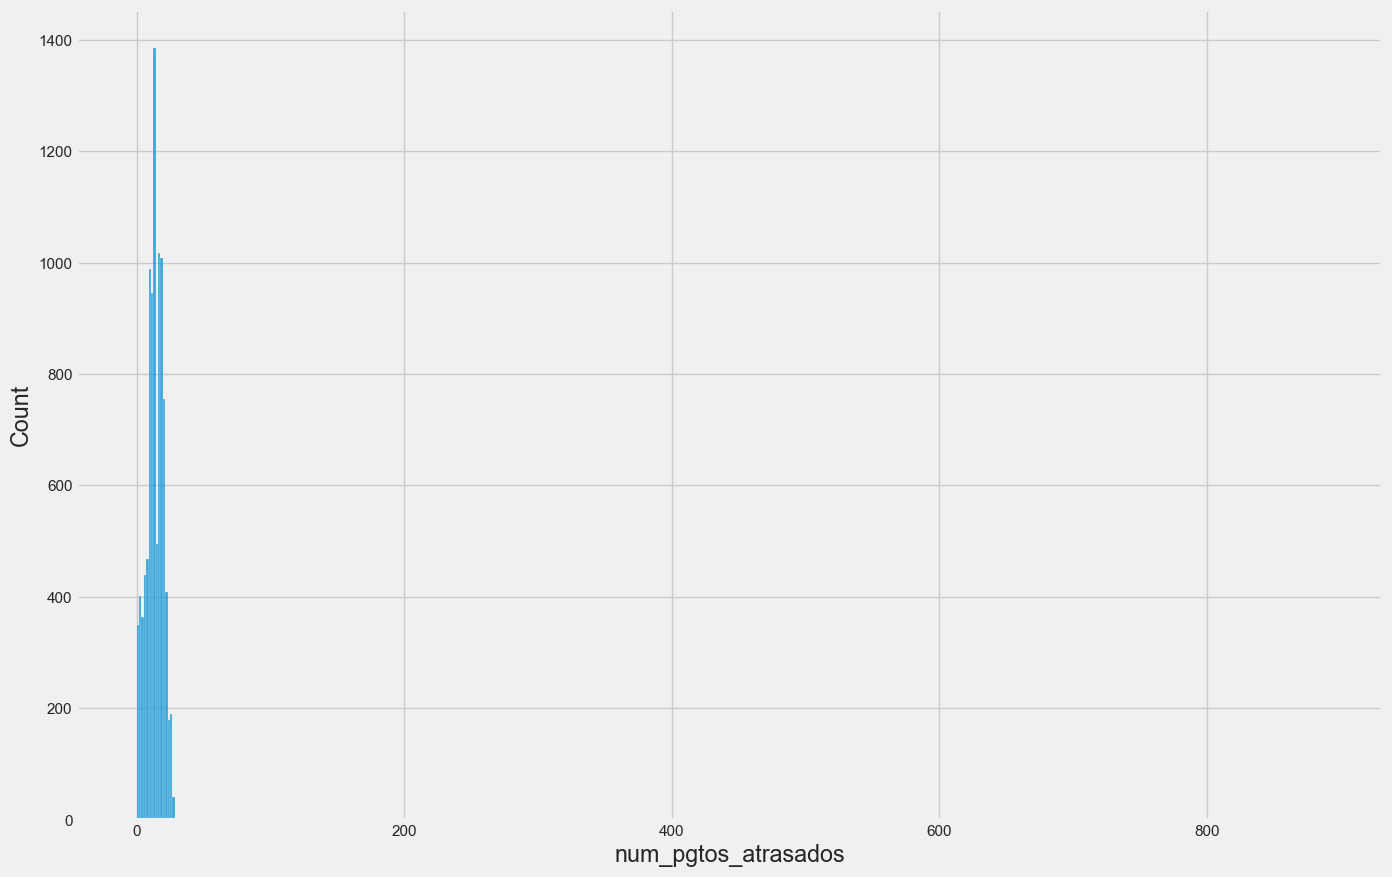

In [37]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[df['num_pgtos_atrasados'] < 1000, 'num_pgtos_atrasados'], bins=500, kde=False);

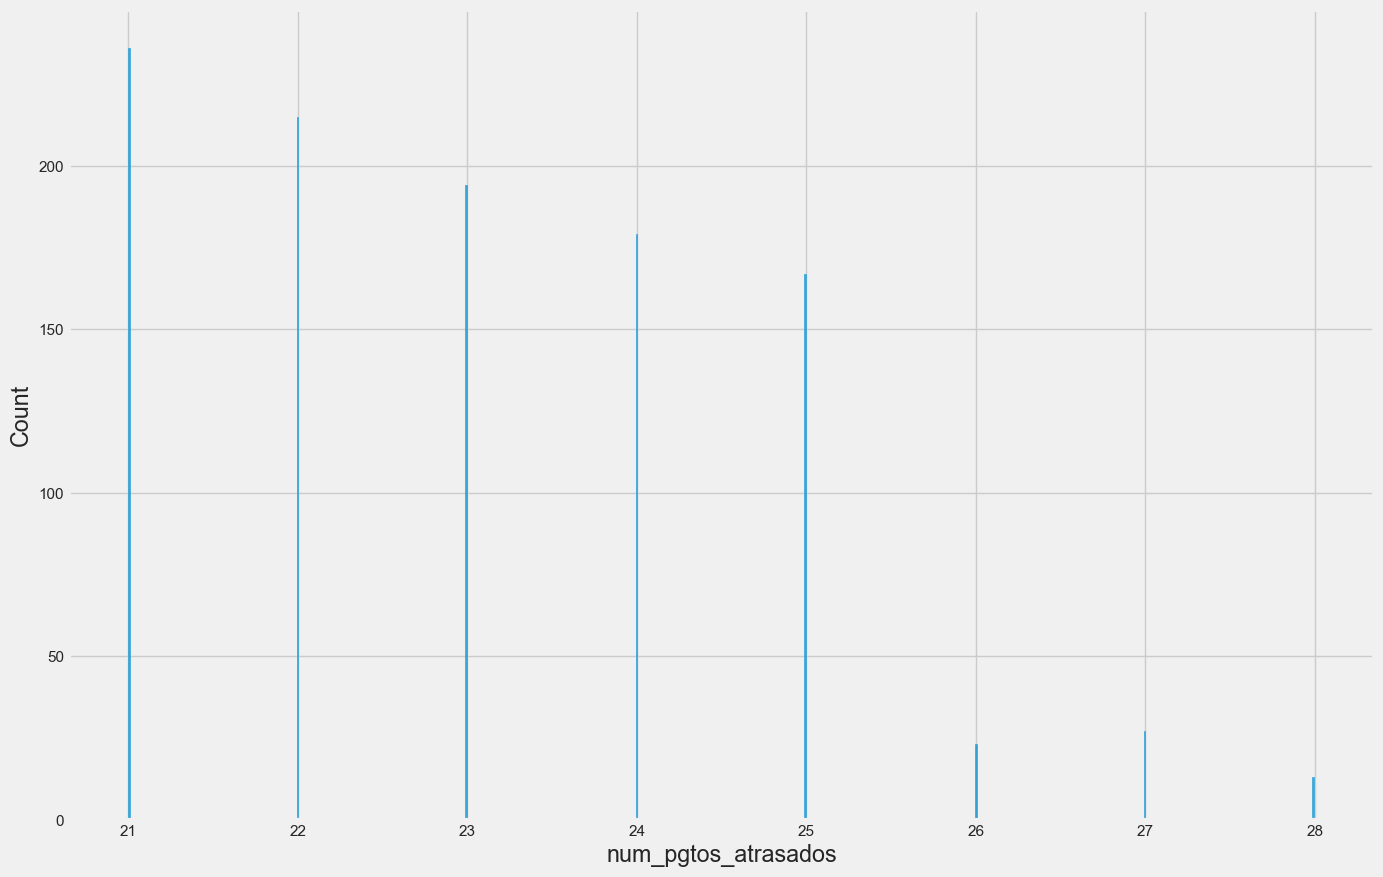

In [38]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[(df['num_pgtos_atrasados'] > 20) & (df['num_pgtos_atrasados'] < 40), 'num_pgtos_atrasados'], bins=500, kde=False);

In [39]:
df.loc[df['num_pgtos_atrasados'] <= 28, 'num_pgtos_atrasados'].median()

14.0

### NUM_CONSULTAS_CREDITO

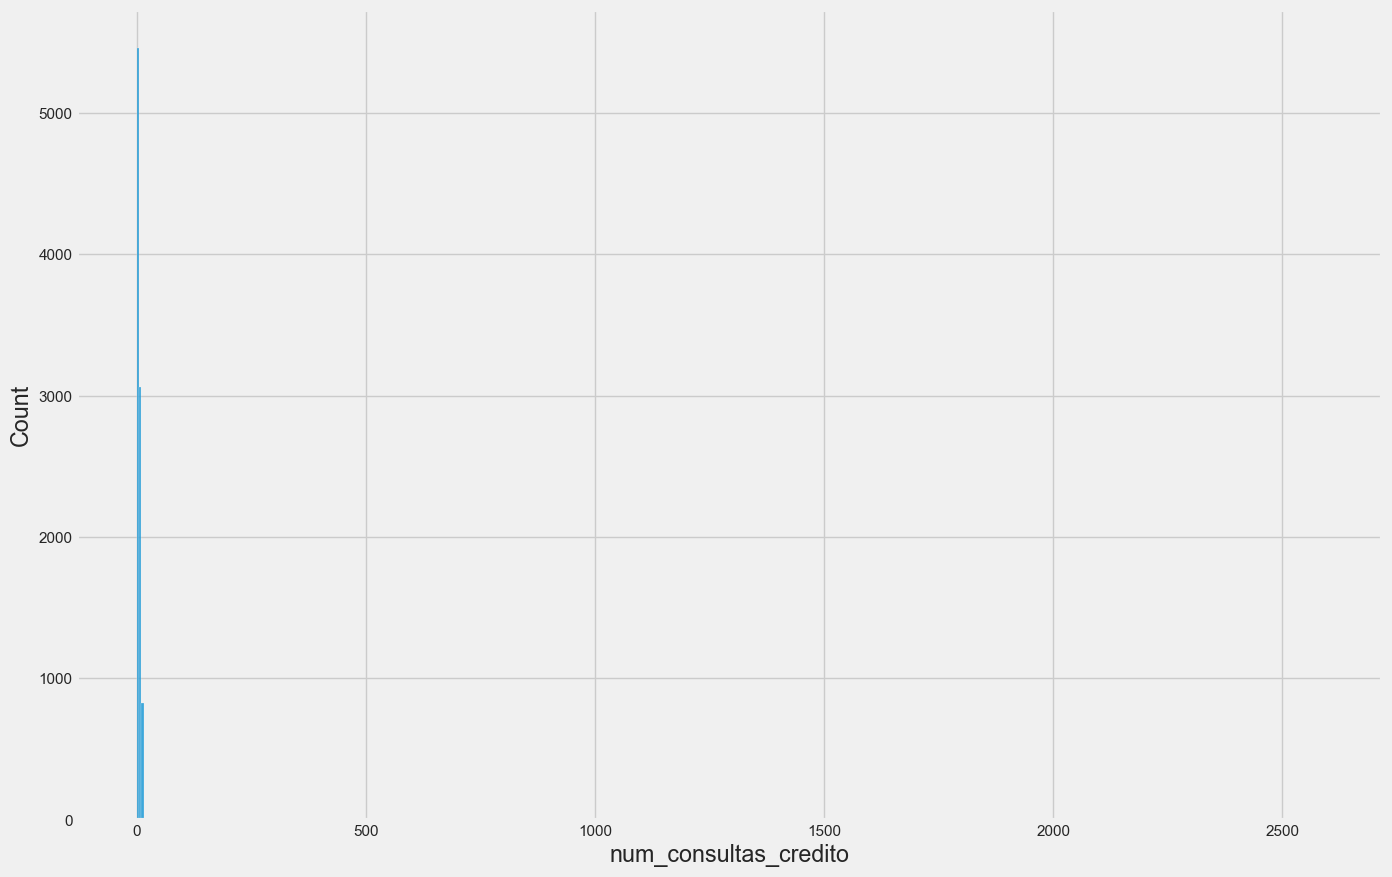

In [40]:
plt.figure(figsize=(15, 10))
sns.histplot(df['num_consultas_credito'], bins=500, kde=False);

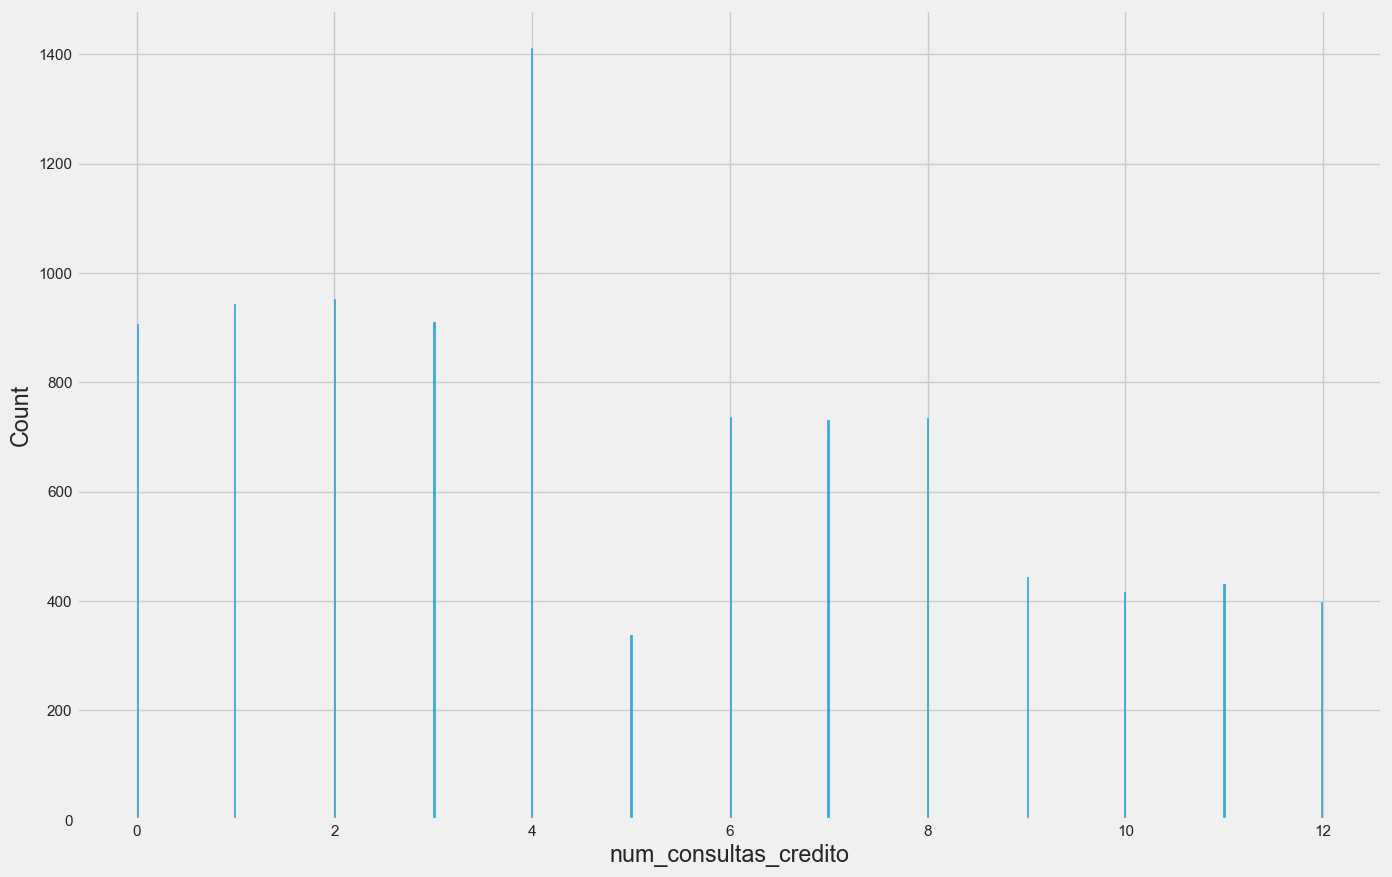

In [41]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[df['num_consultas_credito'] < 20, 'num_consultas_credito'], bins=500, kde=False);

In [42]:
df.loc[df['num_consultas_credito'] <= 10, 'num_consultas_credito'].median()

4.0

### TAXA_JUROS

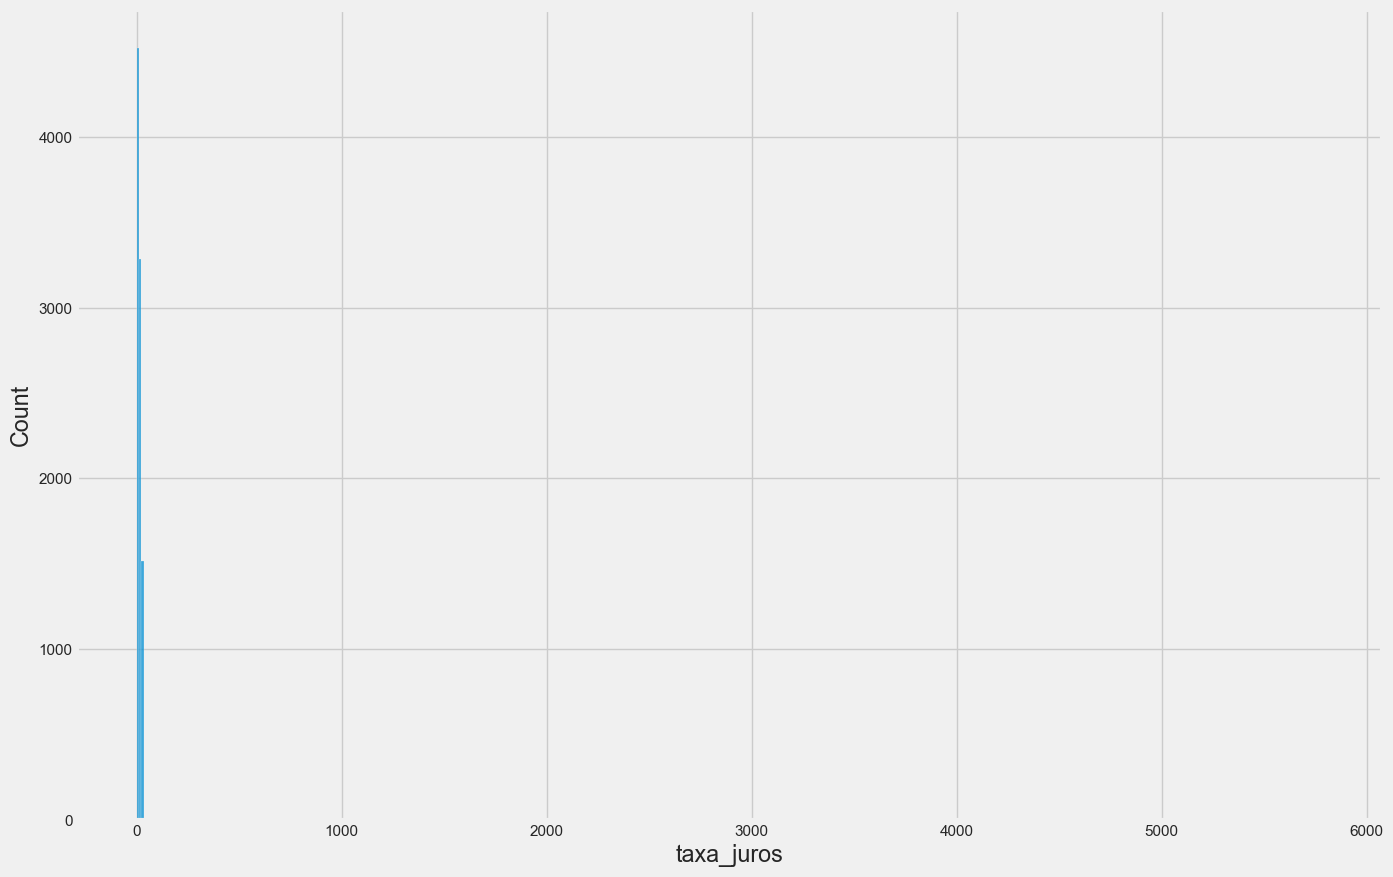

In [43]:
plt.figure(figsize=(15, 10))
sns.histplot(df['taxa_juros'], bins=500, kde=False);

In [44]:
df.loc[df['taxa_juros'] < 40, 'taxa_juros'].shape

(9325,)

In [45]:
df.loc[df['taxa_juros'] < 40, 'taxa_juros'].median()

13.0

In [46]:
df.loc[df['taxa_juros'] == 159, 'taxa_juros'].shape

(1,)

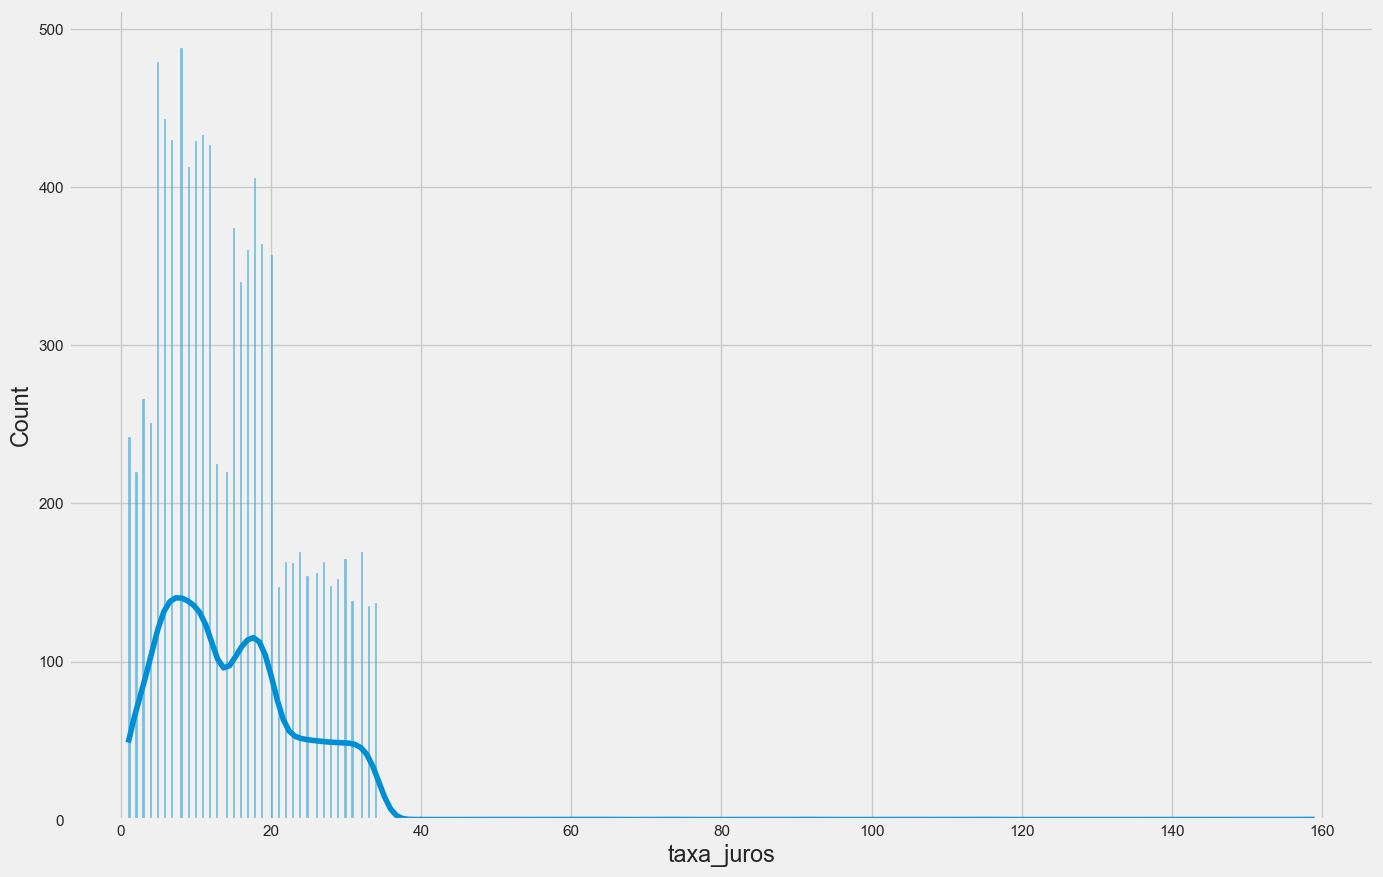

In [47]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[df['taxa_juros'] < 200, 'taxa_juros'], bins=500, kde=True);

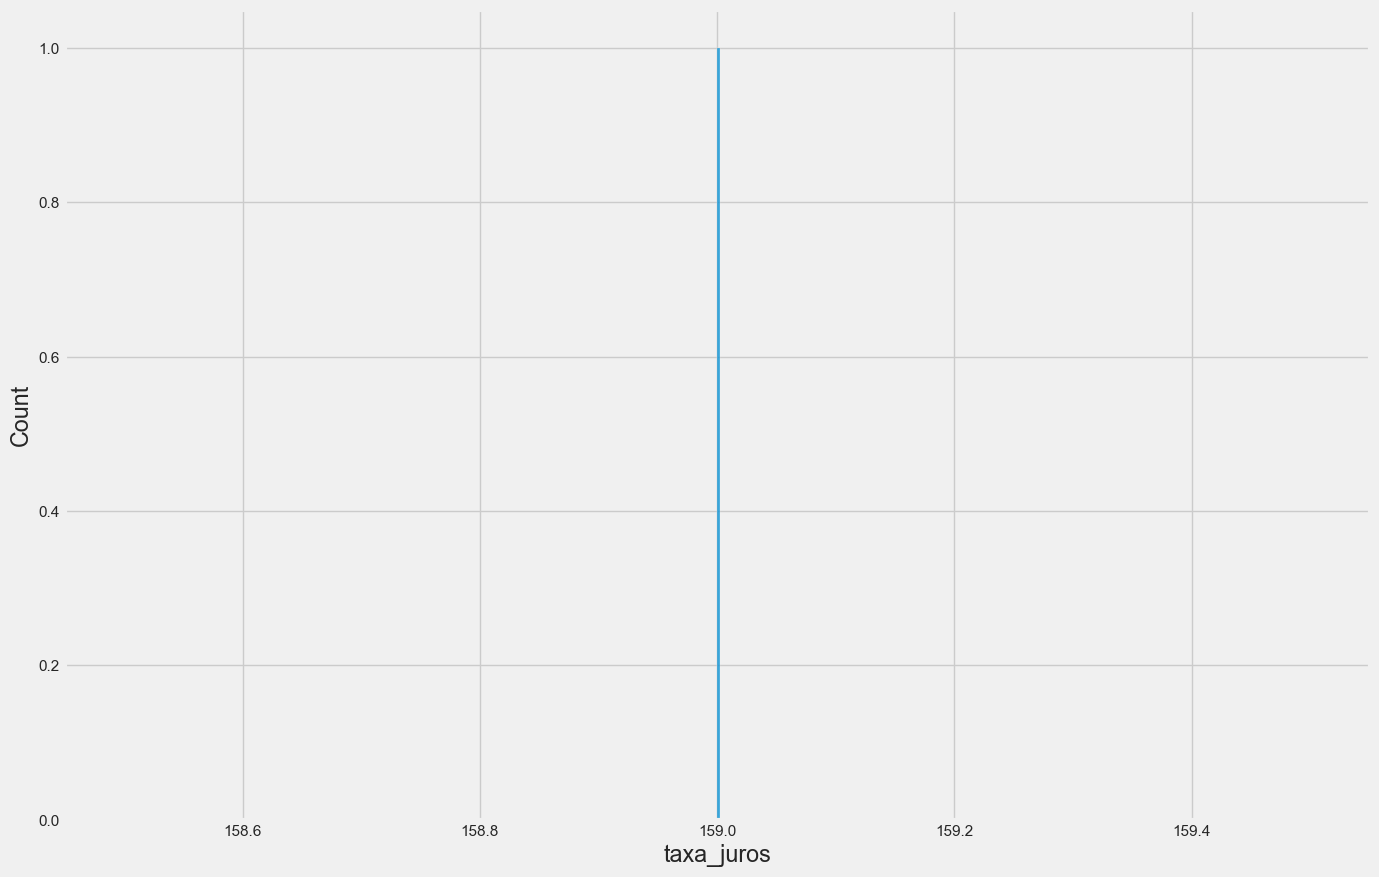

In [48]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[(df['taxa_juros'] > 150) & (df['taxa_juros'] < 200), 'taxa_juros'], bins=500, kde=False);

### IDADE

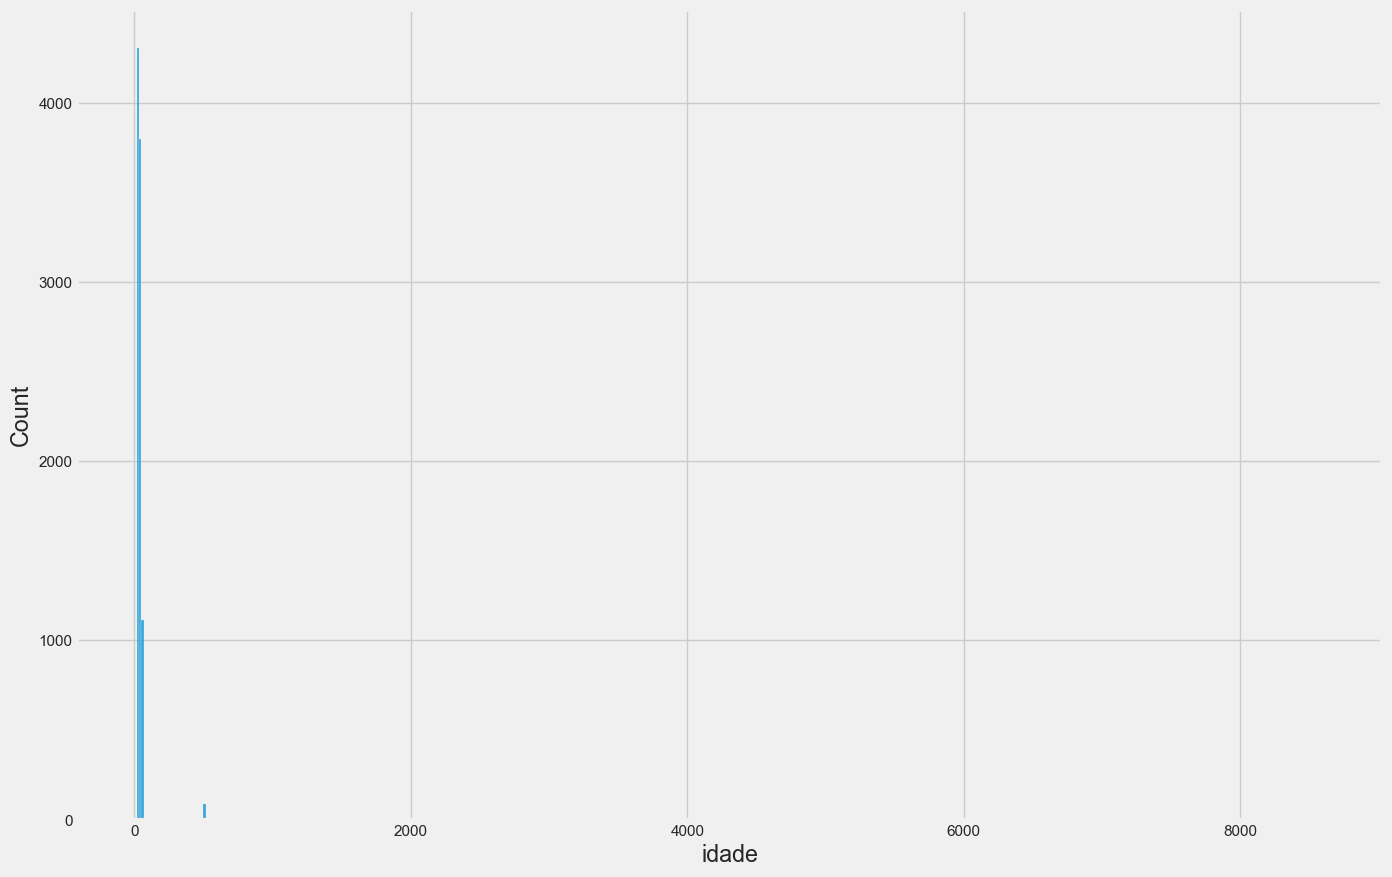

In [49]:
plt.figure(figsize=(15, 10))
sns.histplot(df['idade'], bins=500, kde=False);

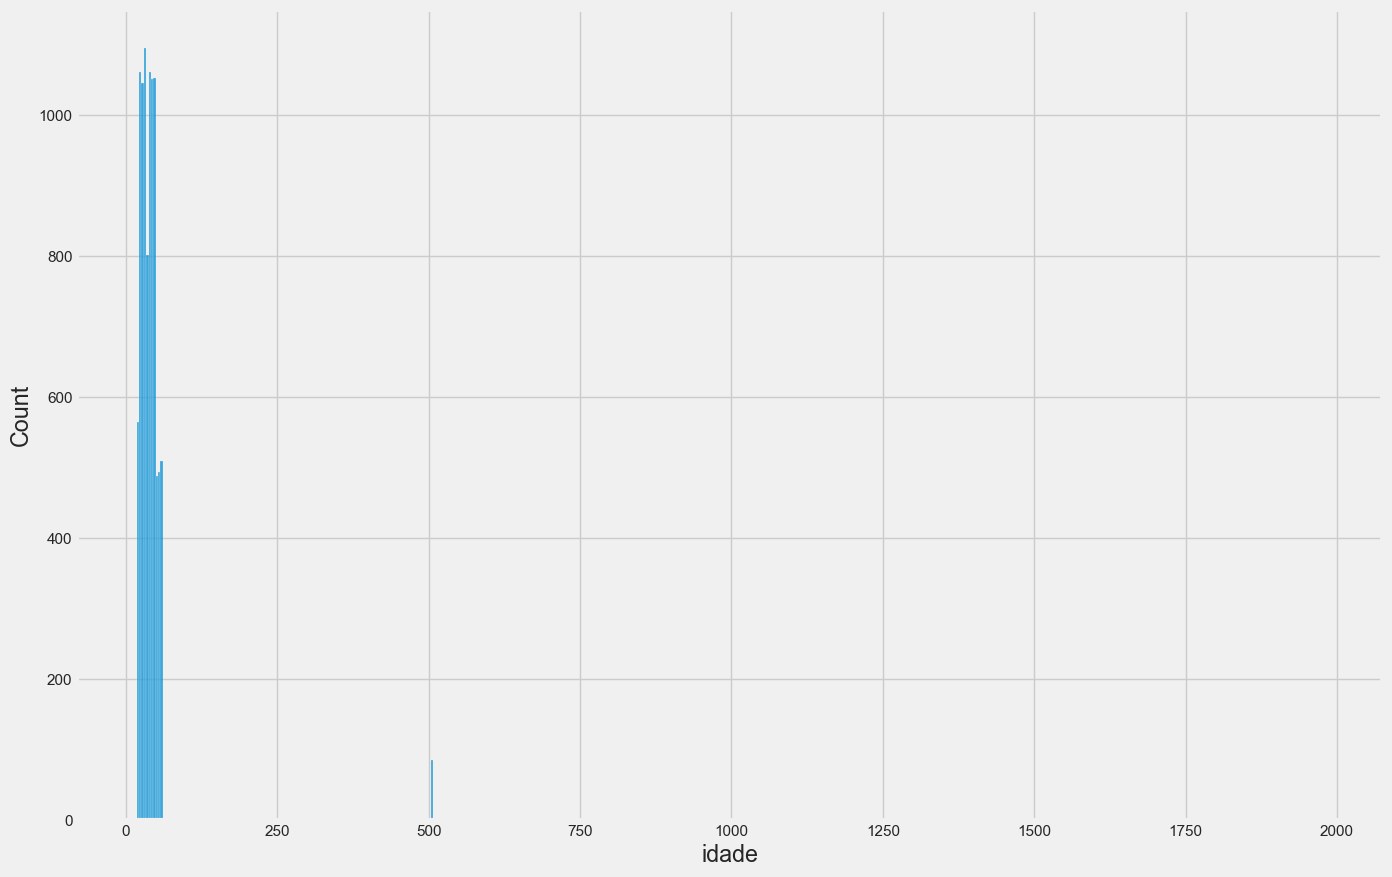

In [50]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[df['idade'] < 2000, 'idade'], bins=500, kde=False);

In [51]:
df.idade.max()

8598

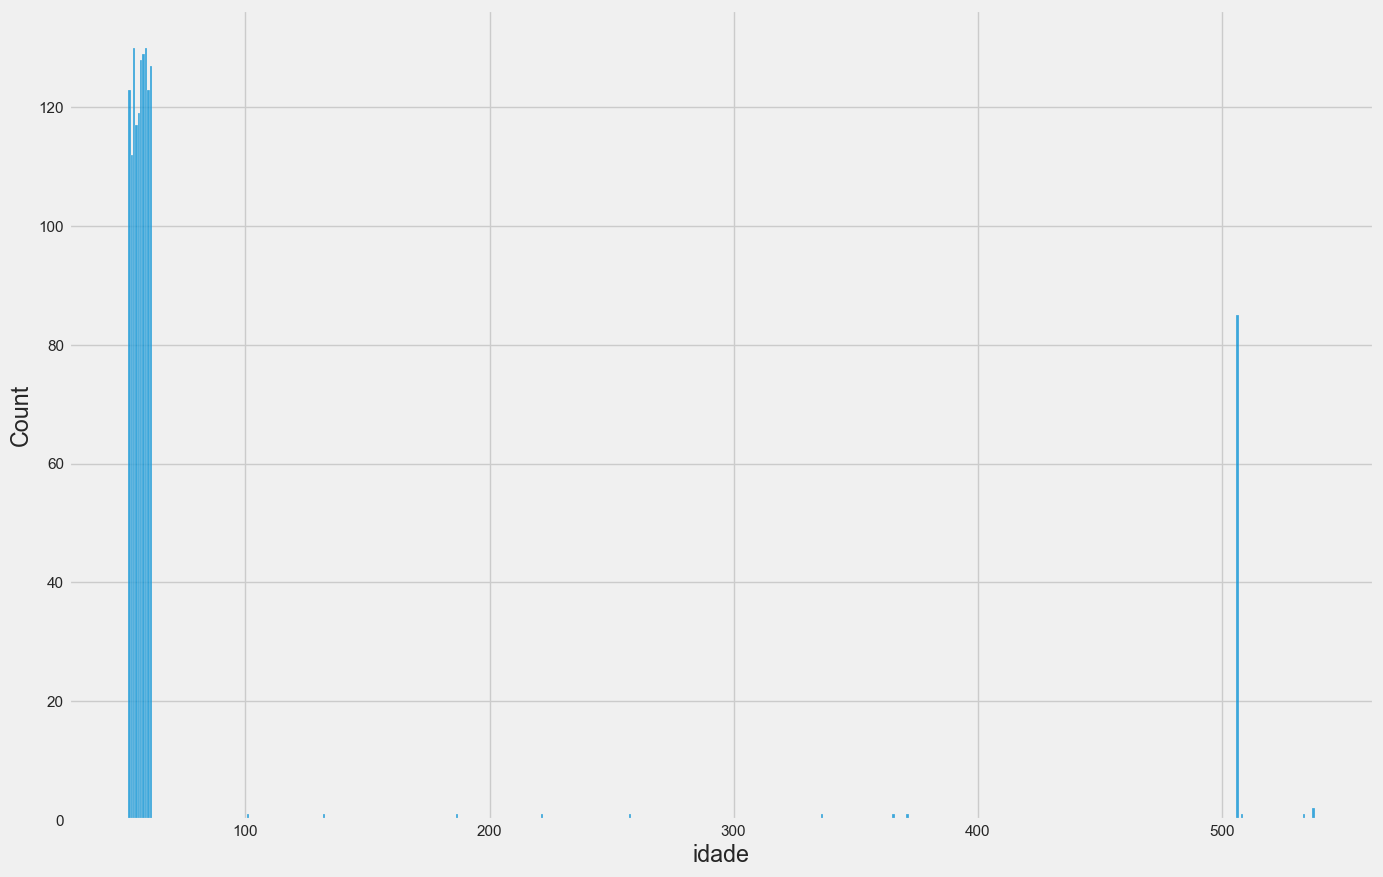

In [52]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[(df['idade'] > 50) & (df['idade'] < 550), 'idade'], bins=500, kde=False);

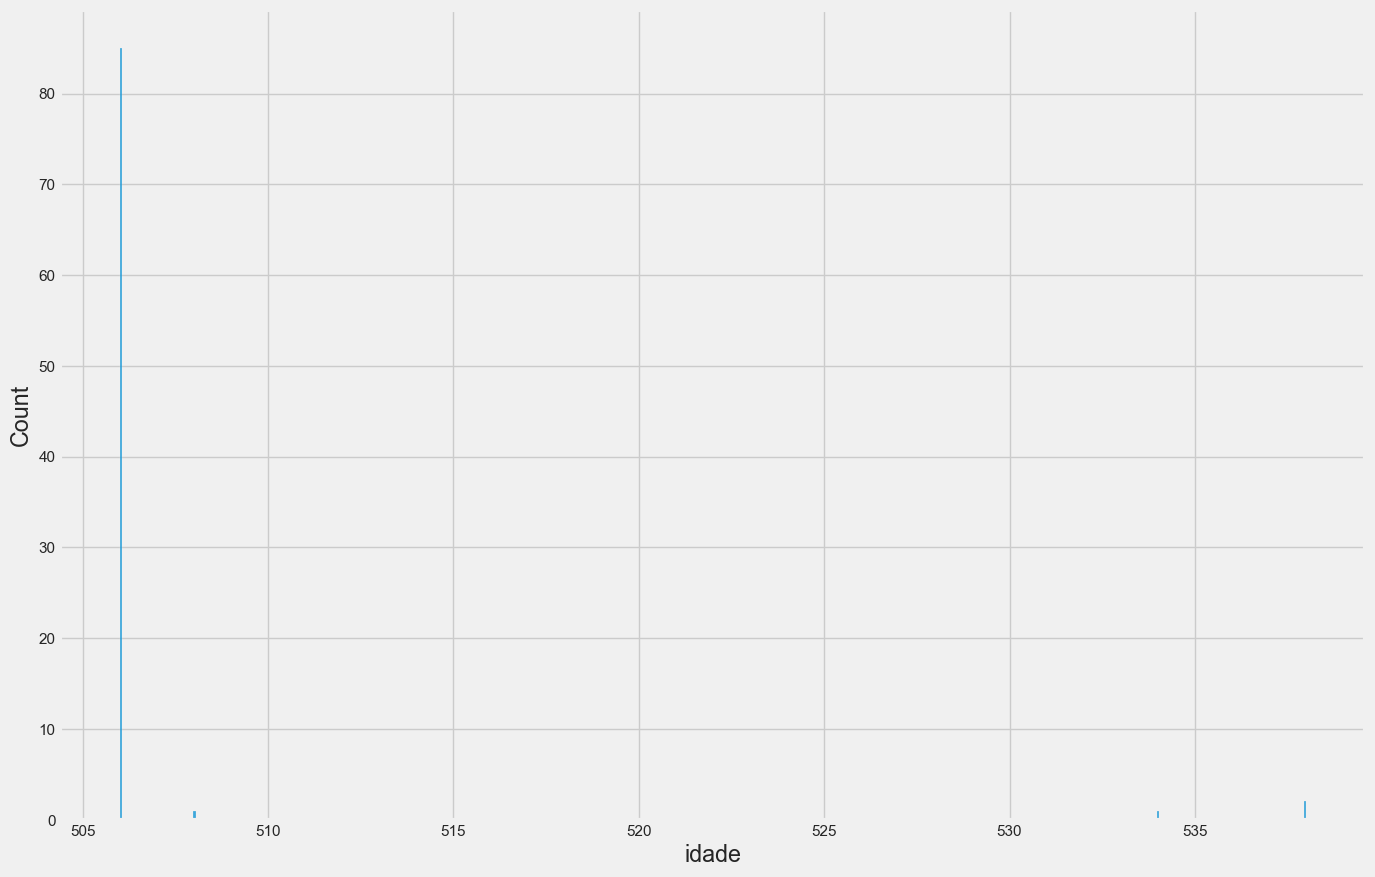

In [53]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[(df['idade'] > 500) & (df['idade'] < 550), 'idade'], bins=500, kde=False);

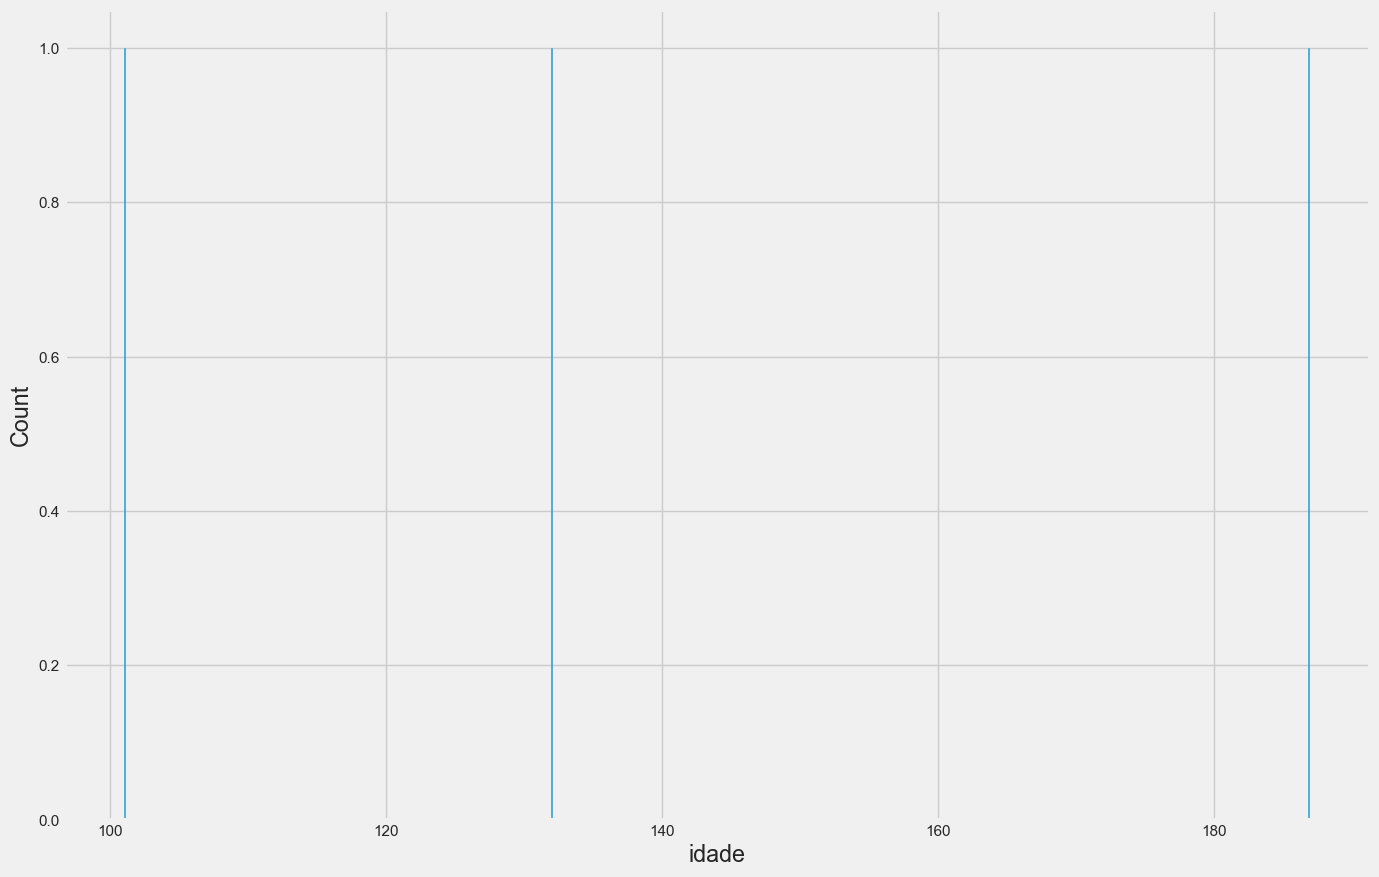

In [54]:
plt.figure(figsize=(15, 10))
sns.histplot(df.loc[(df['idade'] > 100) & (df['idade'] < 200), 'idade'], bins=500, kde=False);

In [55]:
df.loc[(df['idade'] > 100) & (df['idade'] < 200), 'idade']

2143    187
8909    101
9277    132
Name: idade, dtype: int64

In [56]:
df.loc[(df['idade'] > 100), 'idade'].shape

(280,)

In [57]:
df.loc[(df['idade'] < 101), 'idade'].median()

38.0

## Balance

In [58]:
df[['limite_adicional', 'id_cliente']].groupby('limite_adicional').agg({'id_cliente':'count'}).sort_values('limite_adicional', ascending=False)

balance = pd.DataFrame(data=df[['limite_adicional', 'id_cliente']].groupby('limite_adicional').agg({'id_cliente':'count'}).sort_values('limite_adicional', ascending=False), columns=['id_cliente'])
balance['Percent'] = balance['id_cliente'].apply(lambda x: '{:.2f}%'.format(float(x)/df.shape[0]*100))
balance = balance[balance['id_cliente'] > 0]
balance

,id_cliente,Percent
limite_adicional,,
Negar,7995,84.16%
Conceder,1505,15.84%


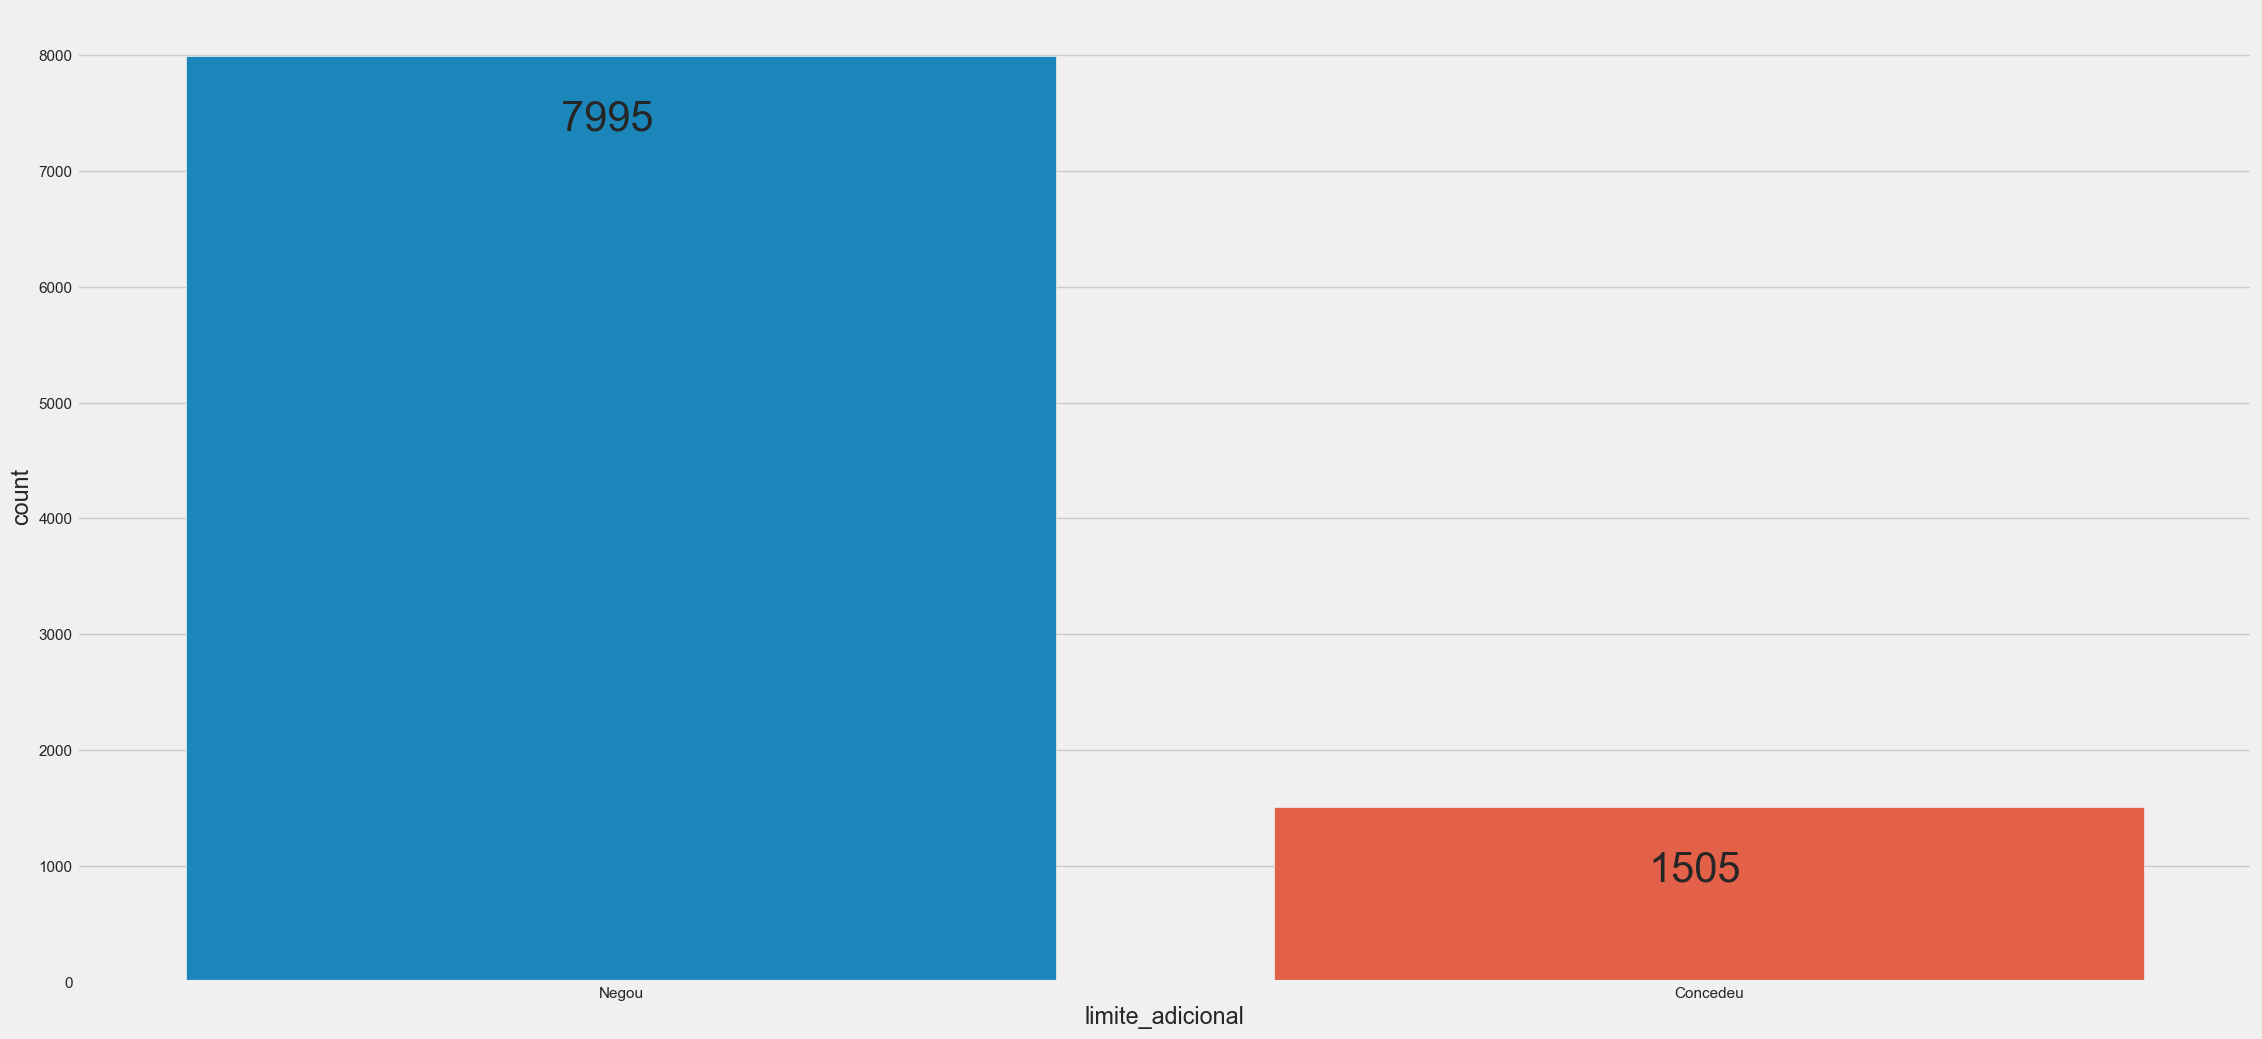

In [59]:
# visualize the target variable
g = sns.countplot(x=df['limite_adicional'])
g.set_xticklabels(['Negou','Concedeu'])
for p in g.patches:
    g.annotate('\n{:.0f}'.format(p.get_height()), (p.get_x()+0.387, p.get_height()), ha='center', va='top', size=30)
plt.show()

## Missing Values

In [60]:
df.isnull().sum()
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissValCount'])
miss_val['Percent'] = miss_val['MissValCount'].apply(lambda x: '{:.2f}'.format(float(x)/df.shape[0]*100))
# miss_val.head()

miss_val

,MissValCount,Percent
id_cliente,0,0.00
num_cartoes_credito,0,0.00
pessoa_polit_exp,0,0.00
investe_exterior,0,0.00
taxa_juros,0,0.00
num_consultas_credito,0,0.00
num_pgtos_atrasados,0,0.00
dias_atraso_dt_venc,0,0.00
num_contas_bancarias,0,0.00
idade,0,0.00


## Correlation Heatmap

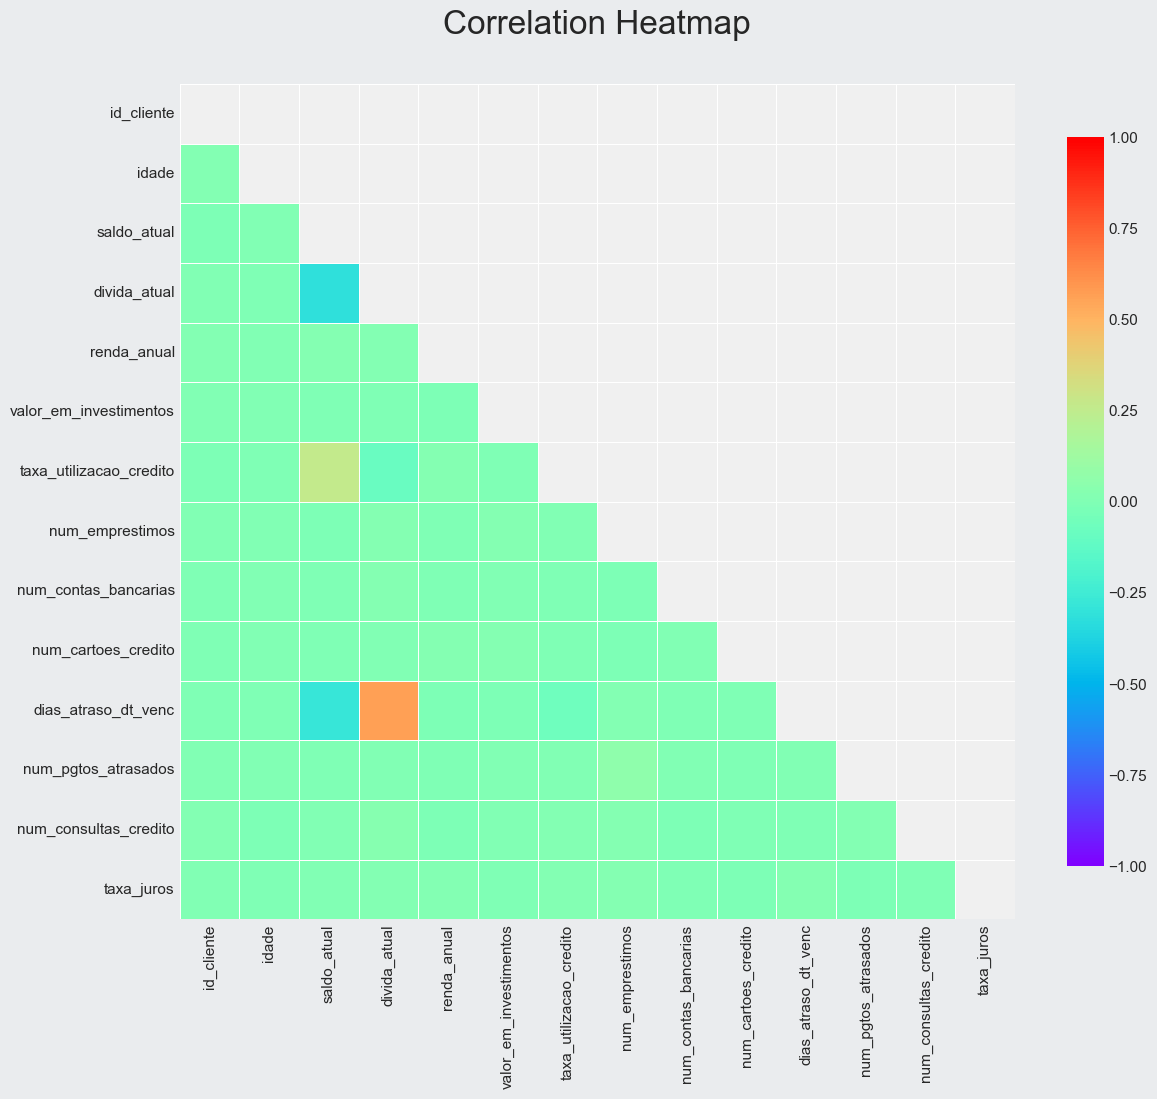

In [61]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 12), facecolor='#EAECEE')
cmap = sns.color_palette("rainbow", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1., center=0, annot=False,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75})

ax.set_title('Correlation Heatmap', fontsize=24, y= 1.05)
colorbar = ax.collections[0].colorbar

- Podemos observar uma correlação significativa entre a variável 'dias_atraso' com 'dívida_atual'
- Saldo_atual também possui leve correlação com "taxa_utilização_credito"
- Temos que tratar os outliers para posterior analise de correlação.

## Bivariate Analysis which matters

In [62]:
bivar_data = df[(df['valor_em_investimentos'] != 10_000) & 
            (df['renda_anual'] < 200_000) & 
            (df['taxa_juros'] < 40) & 
            (df['num_consultas_credito'] < 12) & 
            (df['idade'] < 101) & 
            (df['num_cartoes_credito'] <= 11) & 
            (df['num_emprestimos'] < 28) & 
            (df['num_contas_bancarias'] < 11) & 
            (df['num_pgtos_atrasados'] < 30)]

In [63]:
bivar_data.shape

(7389, 17)

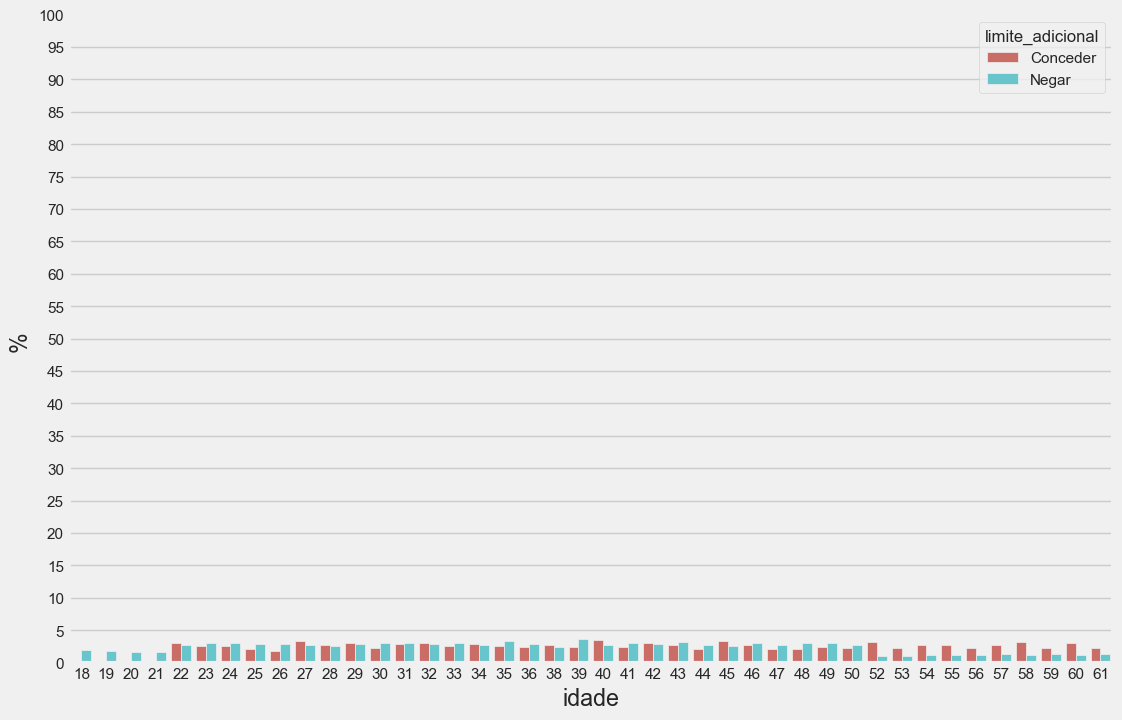

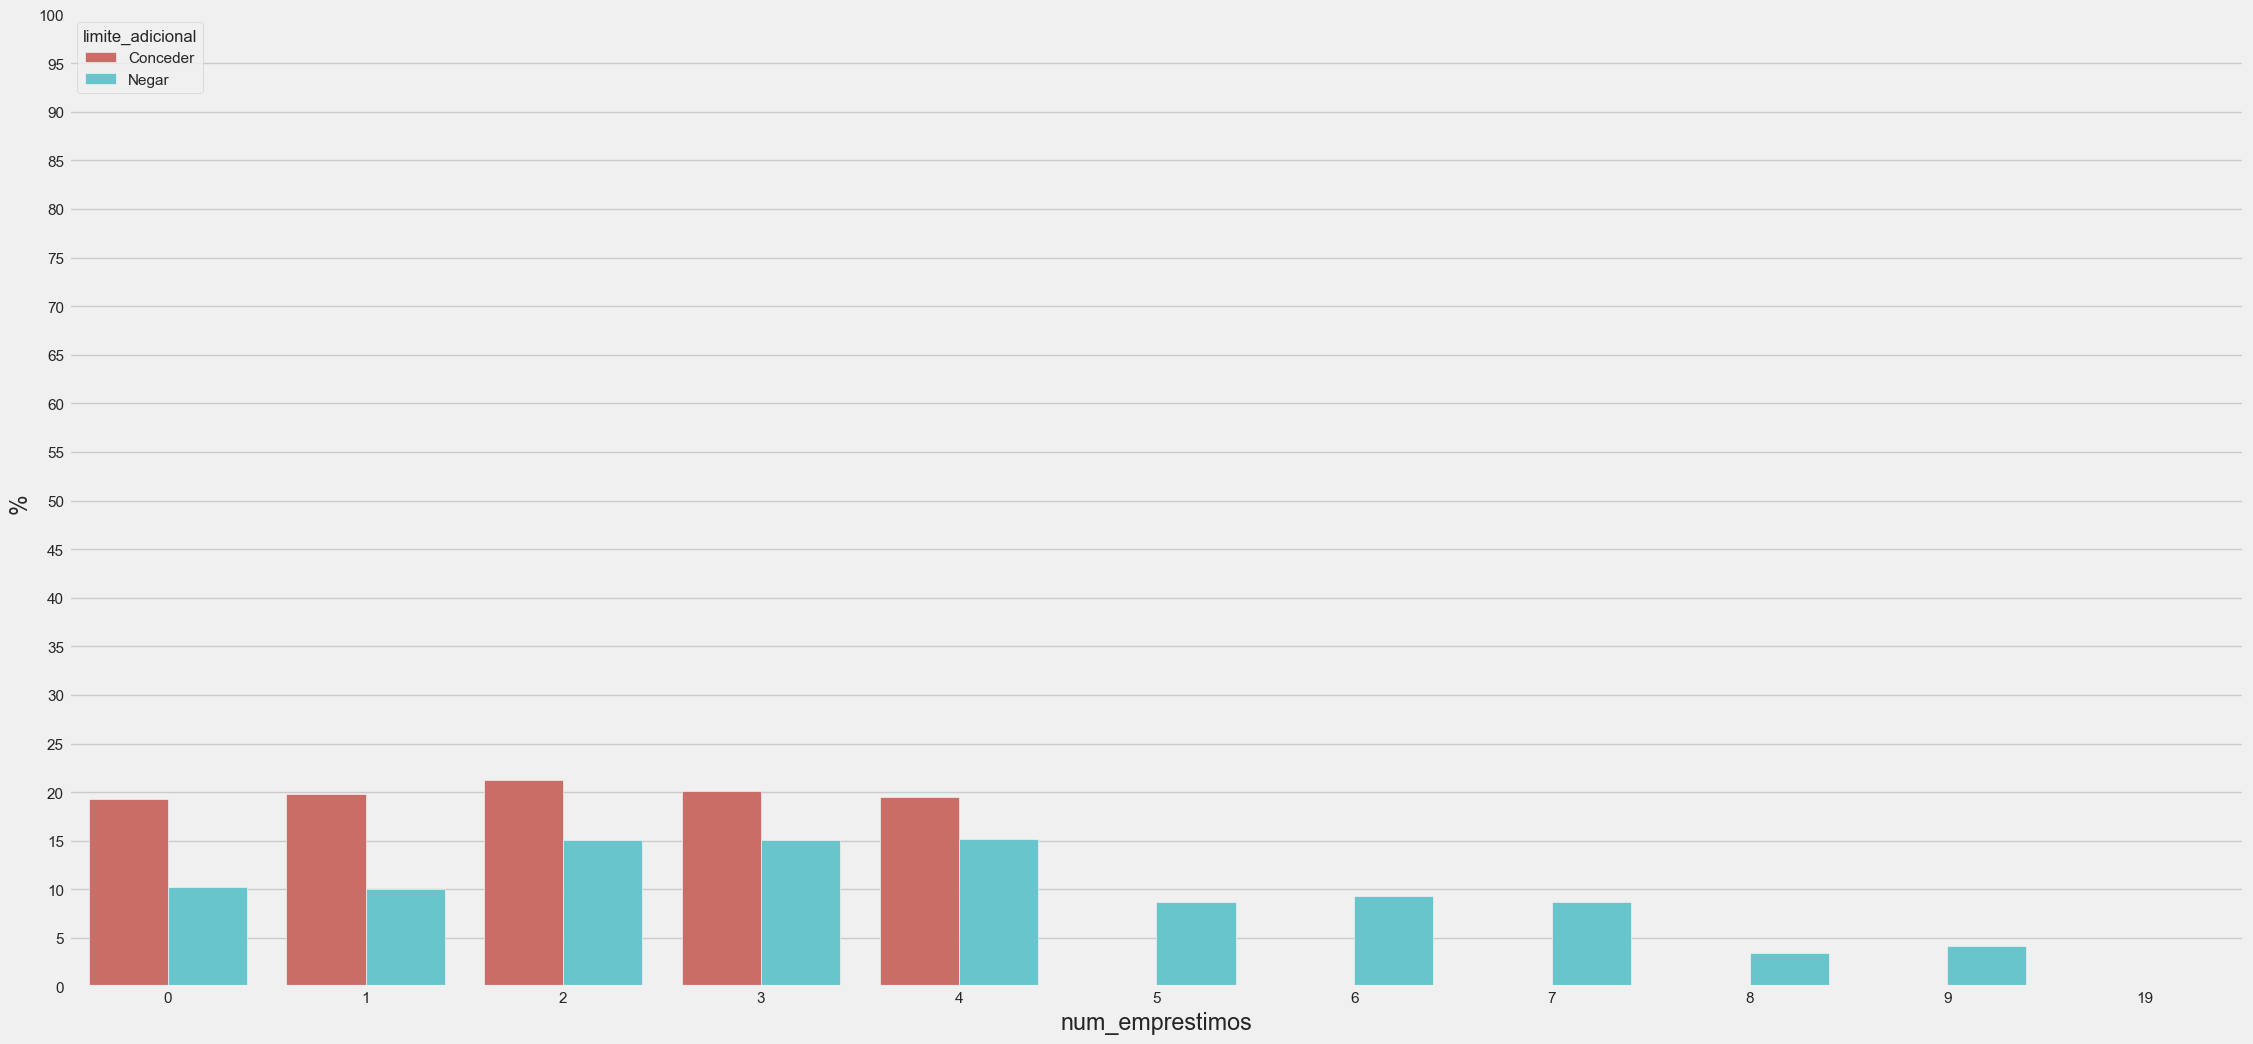

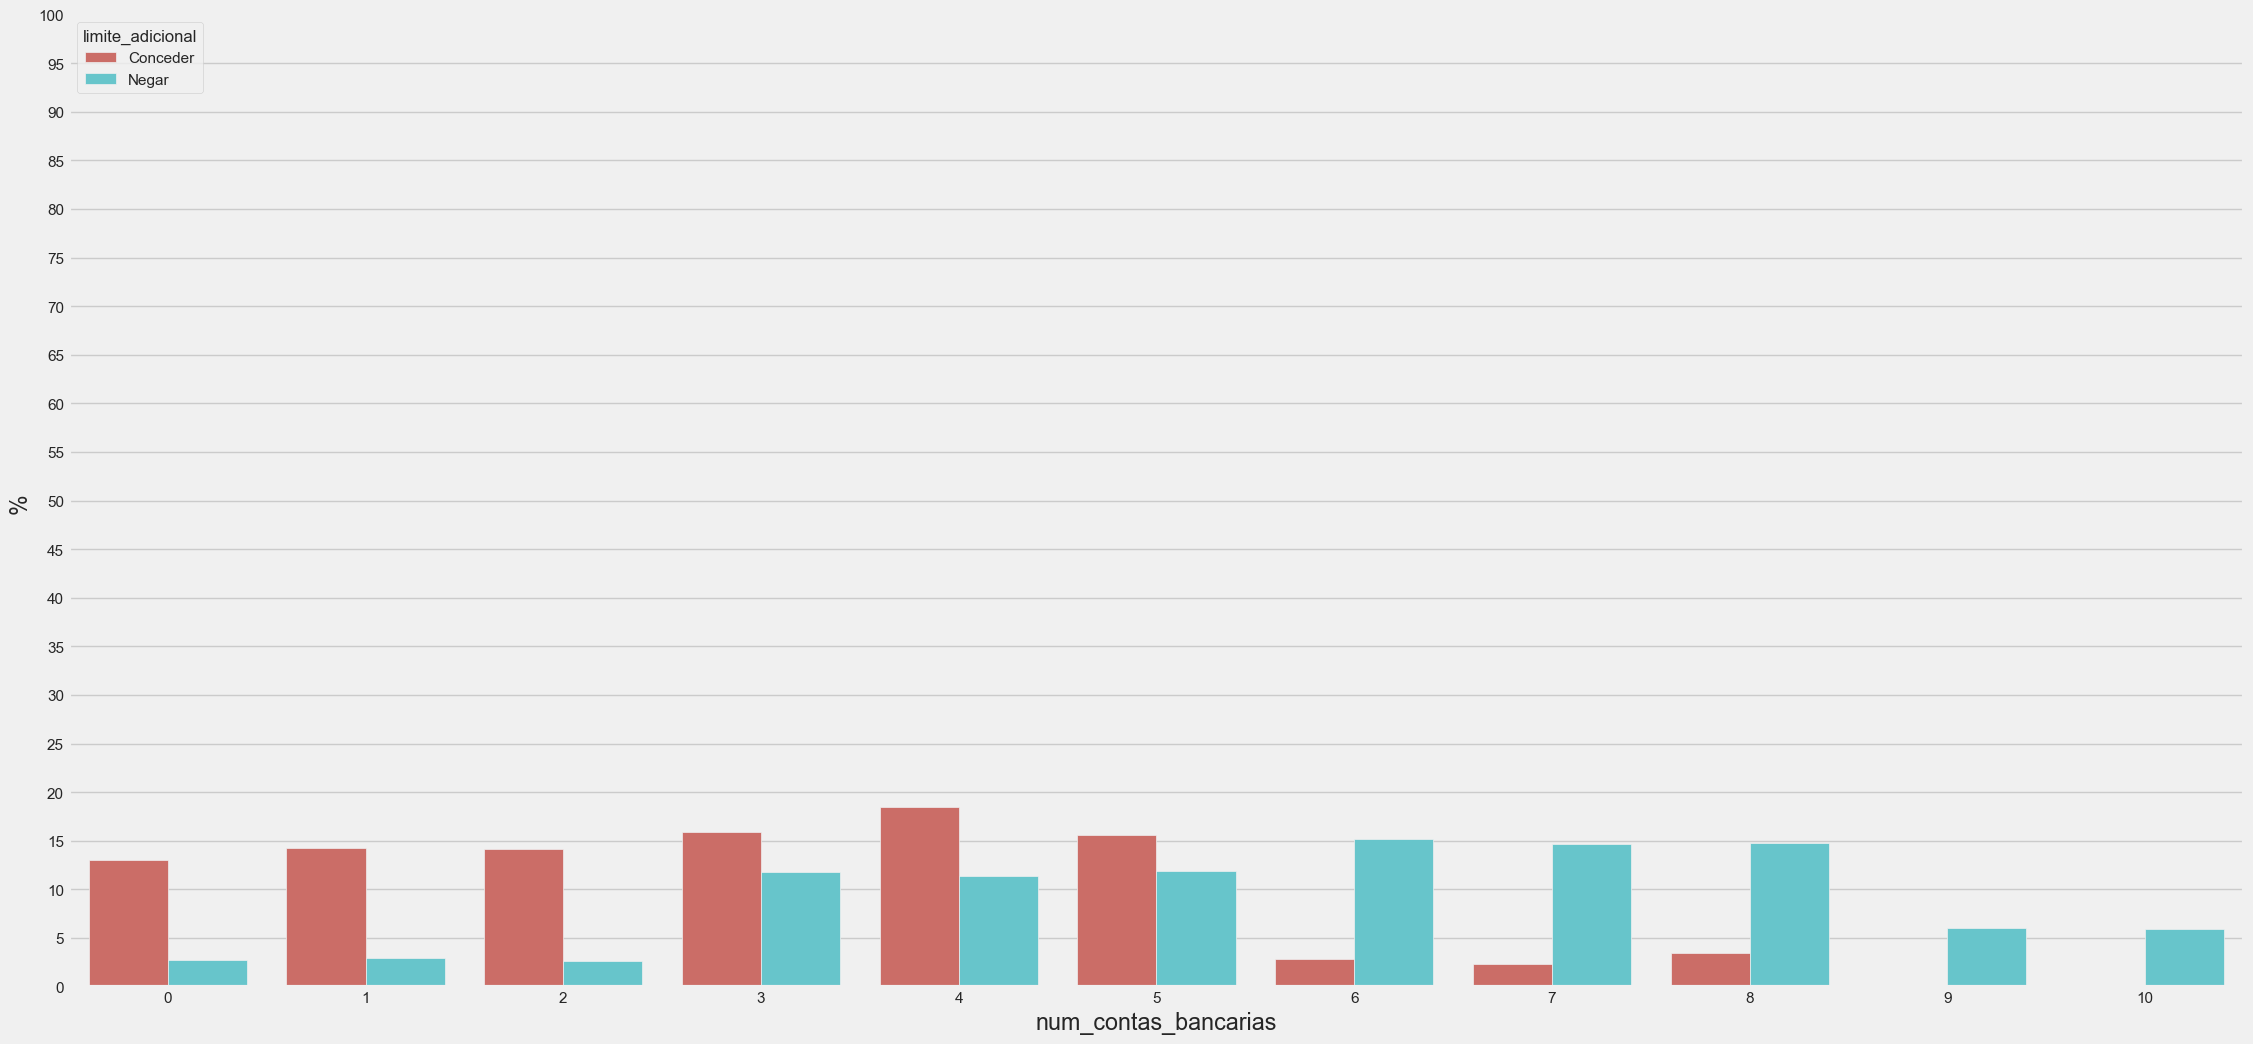

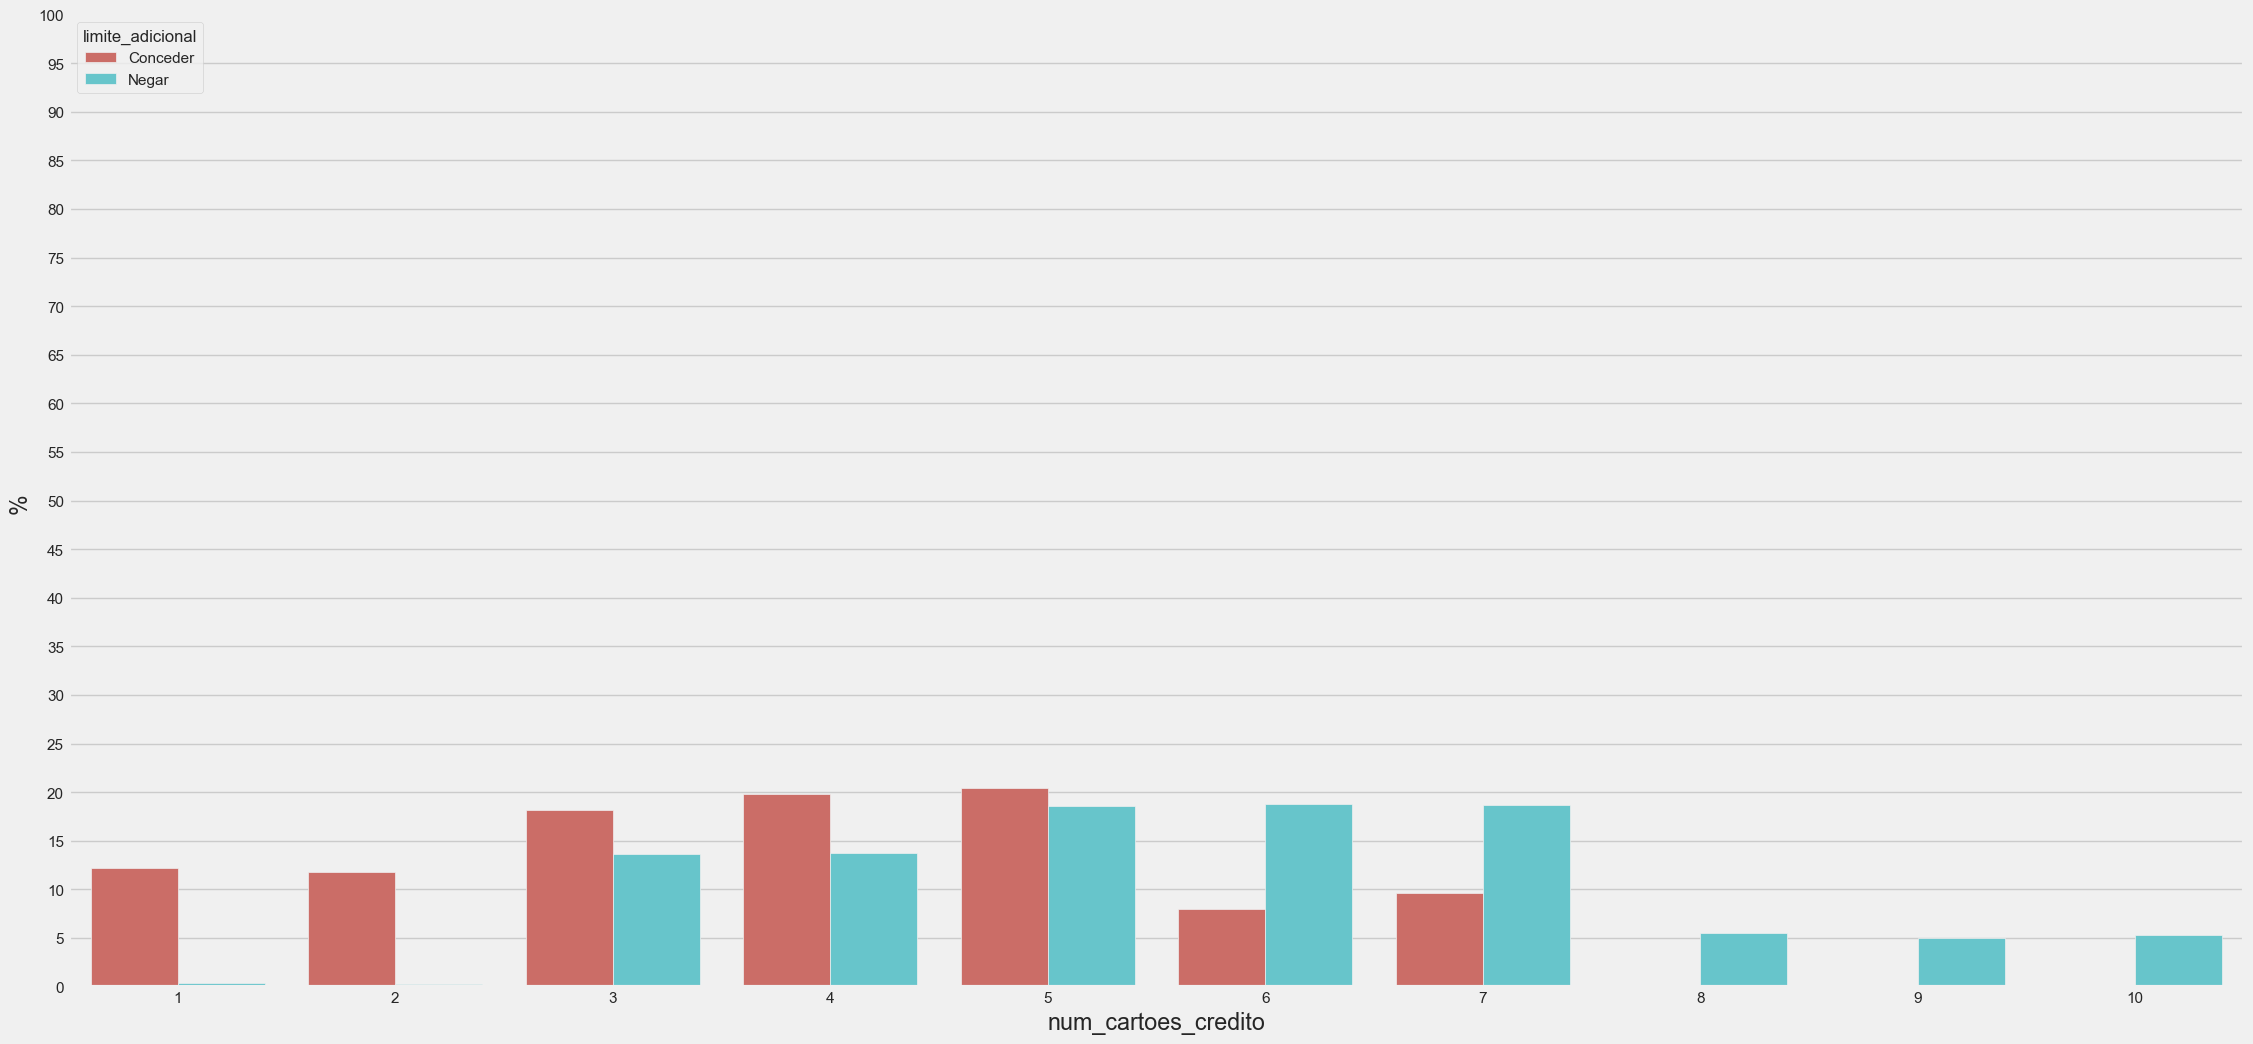

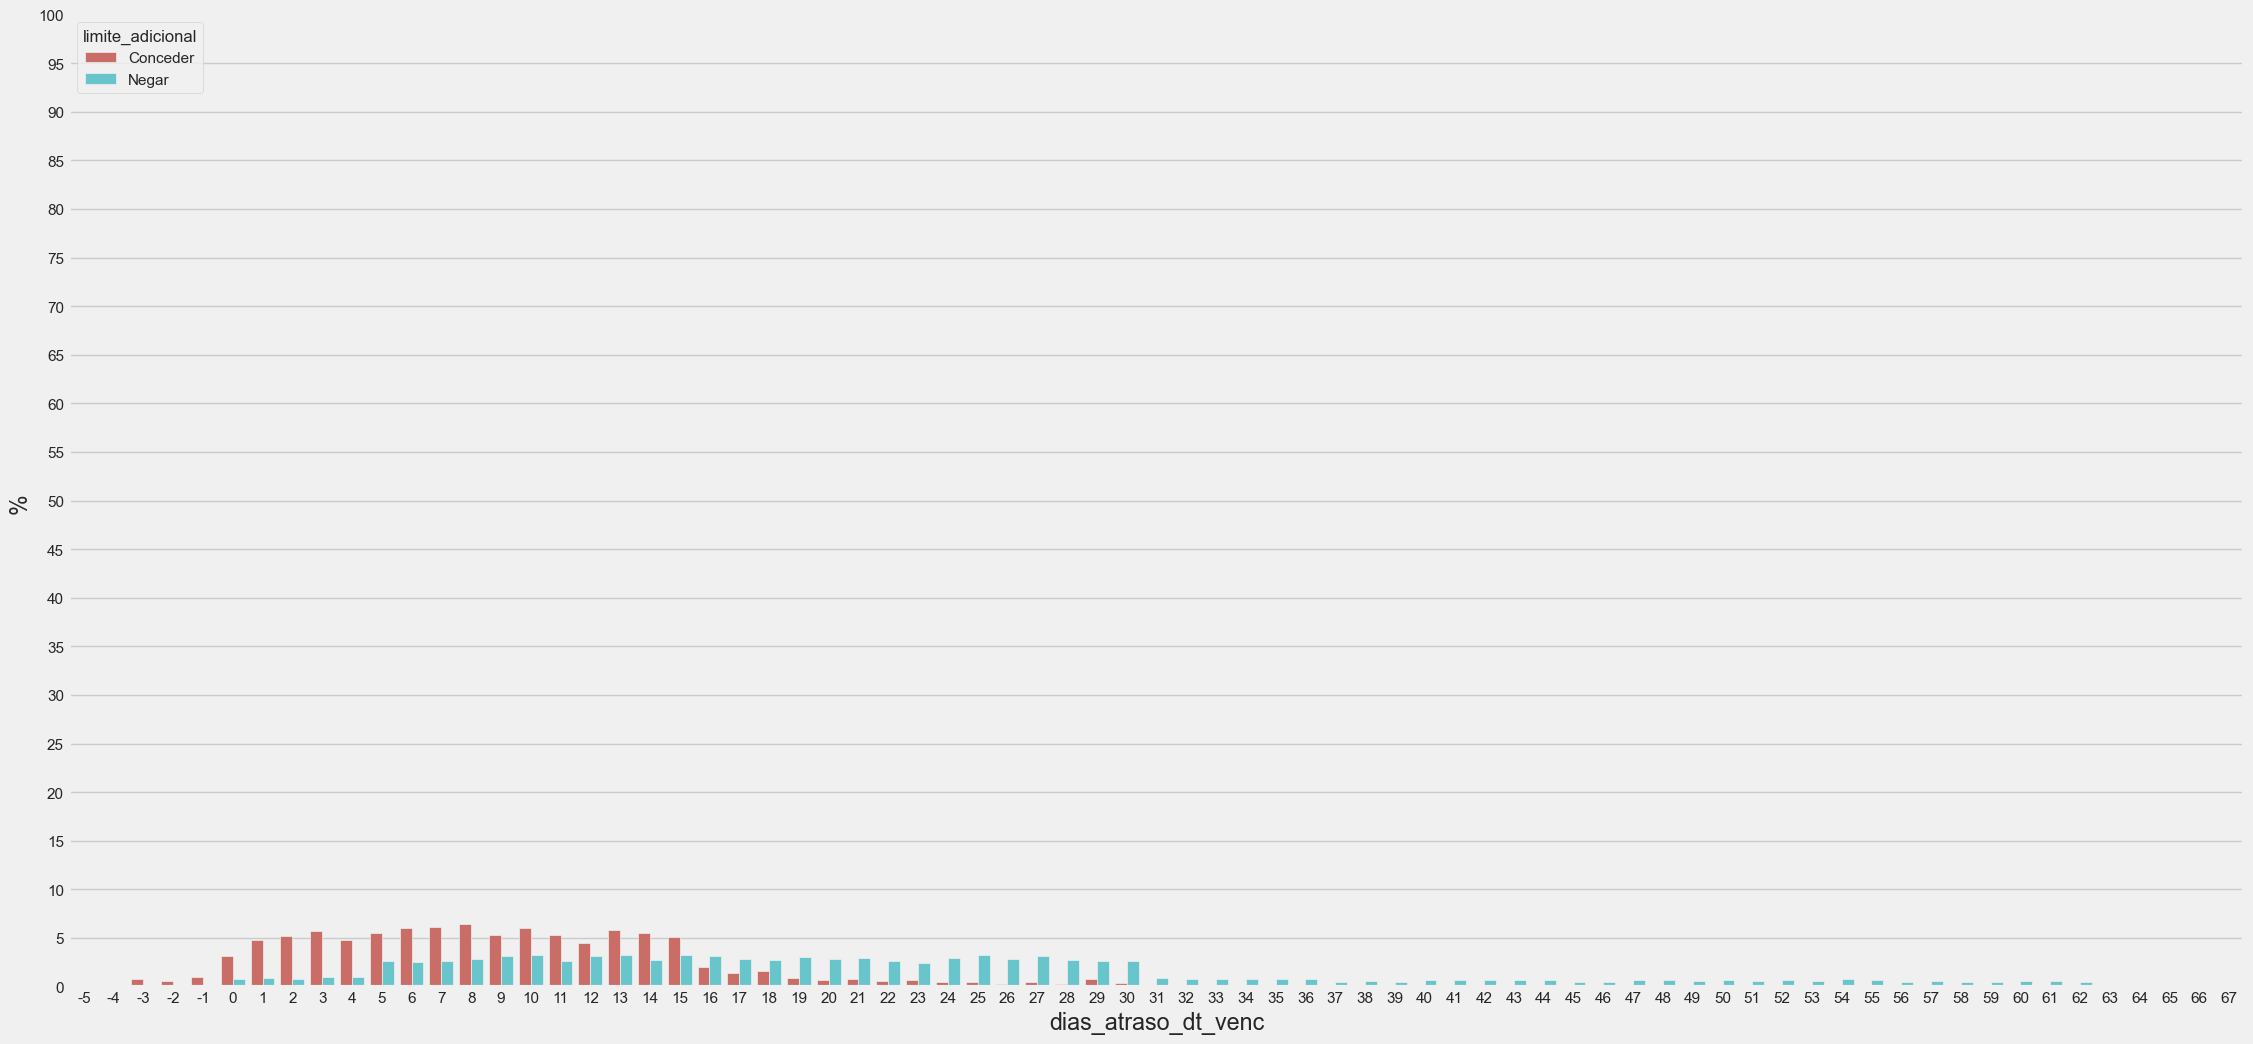

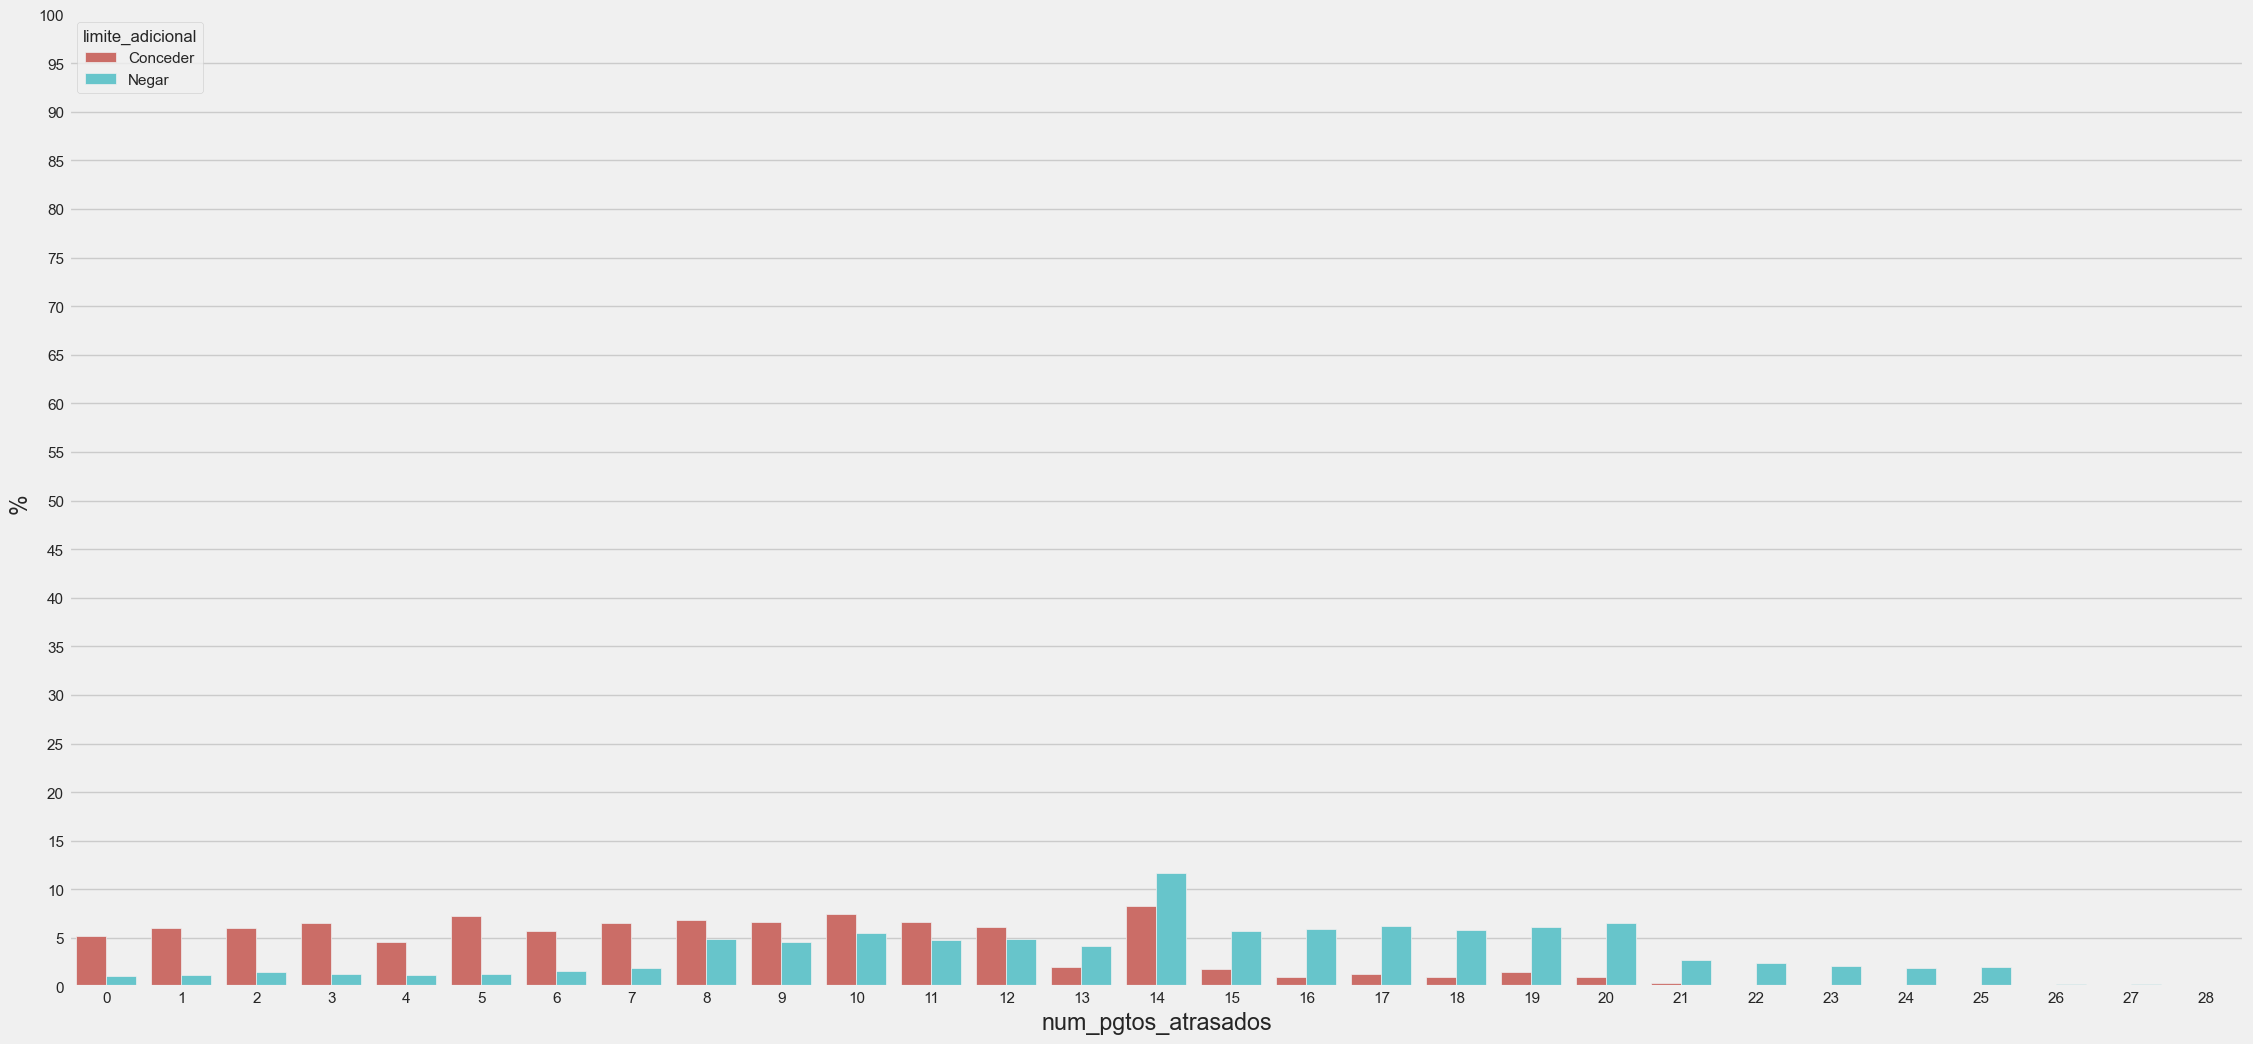

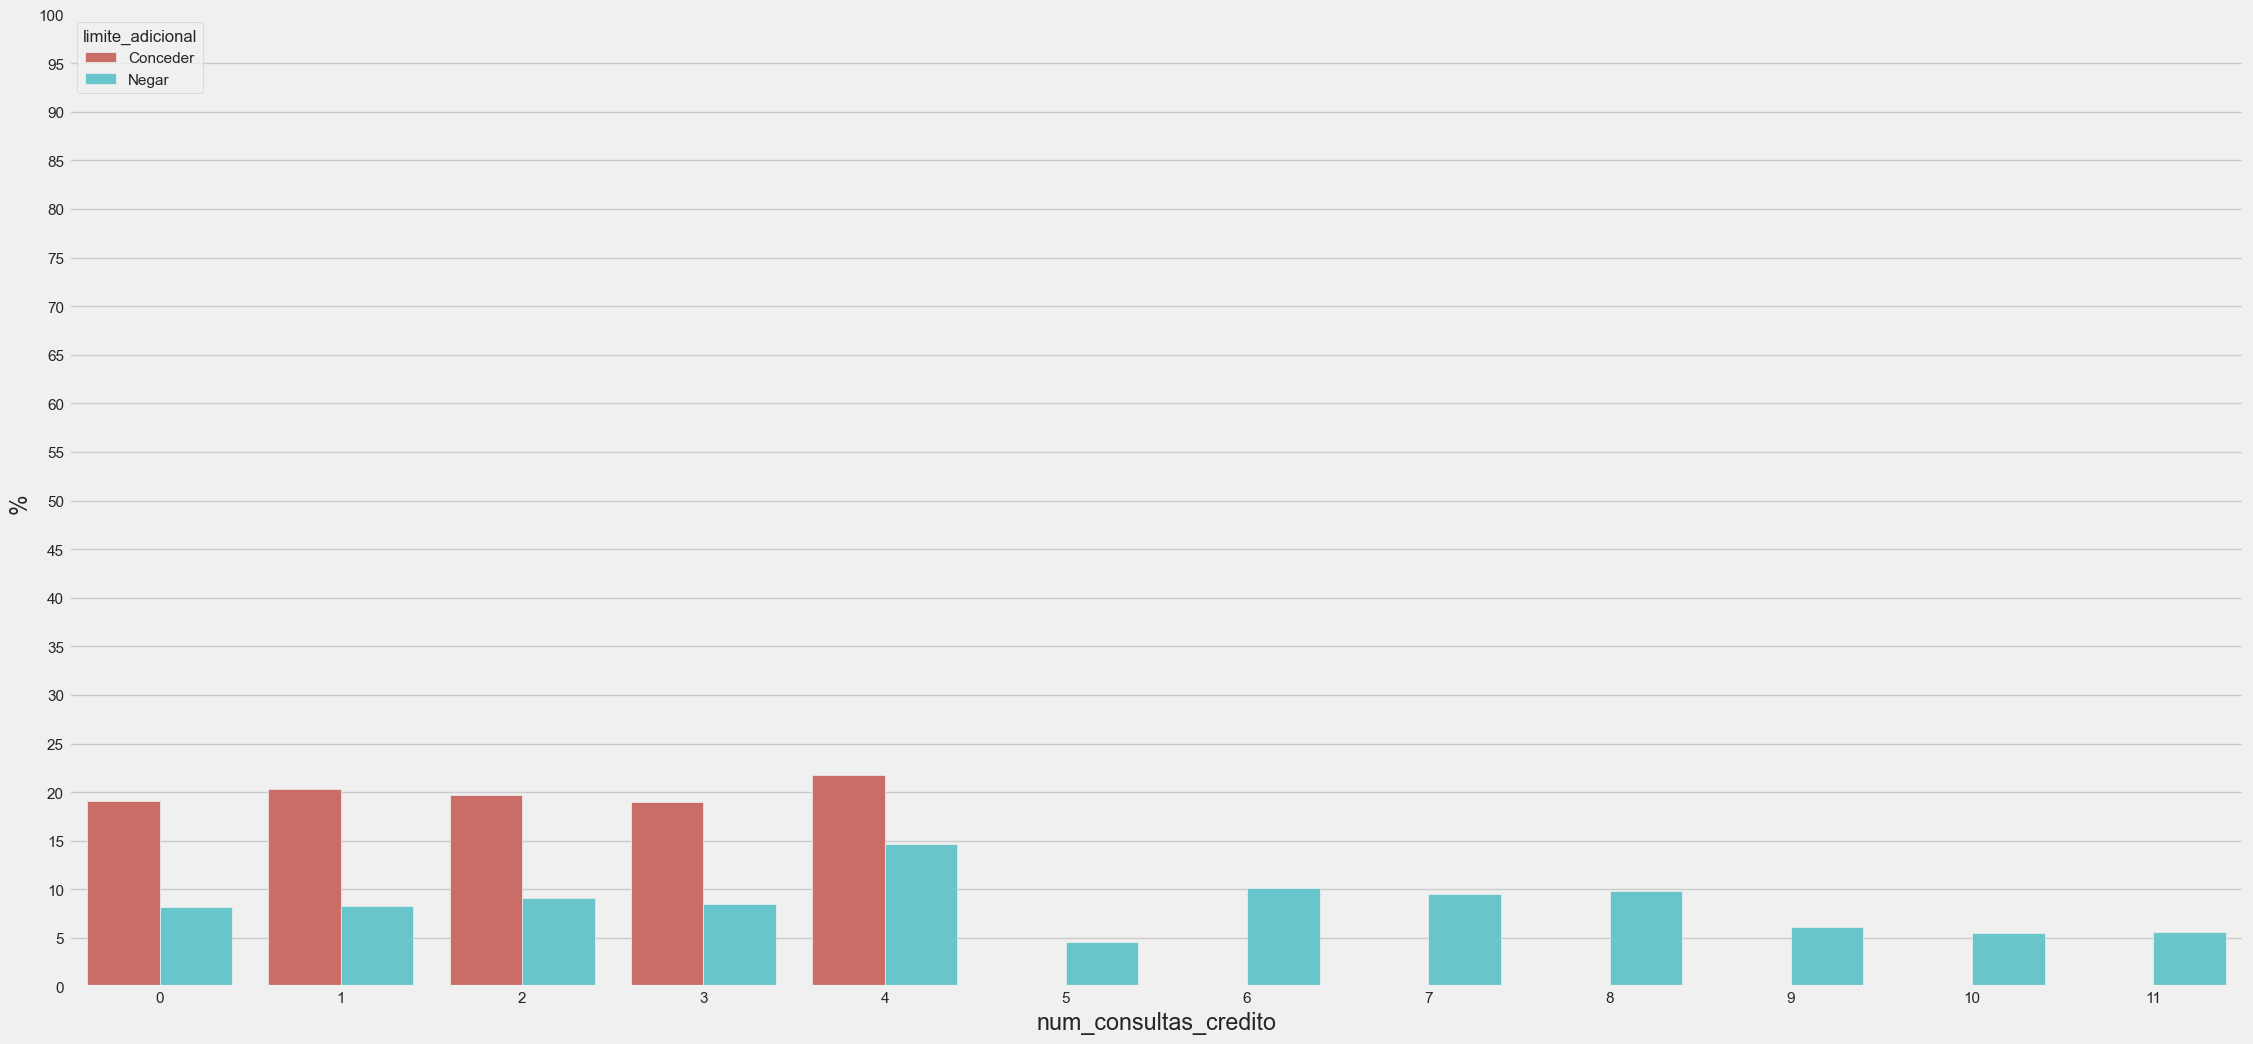

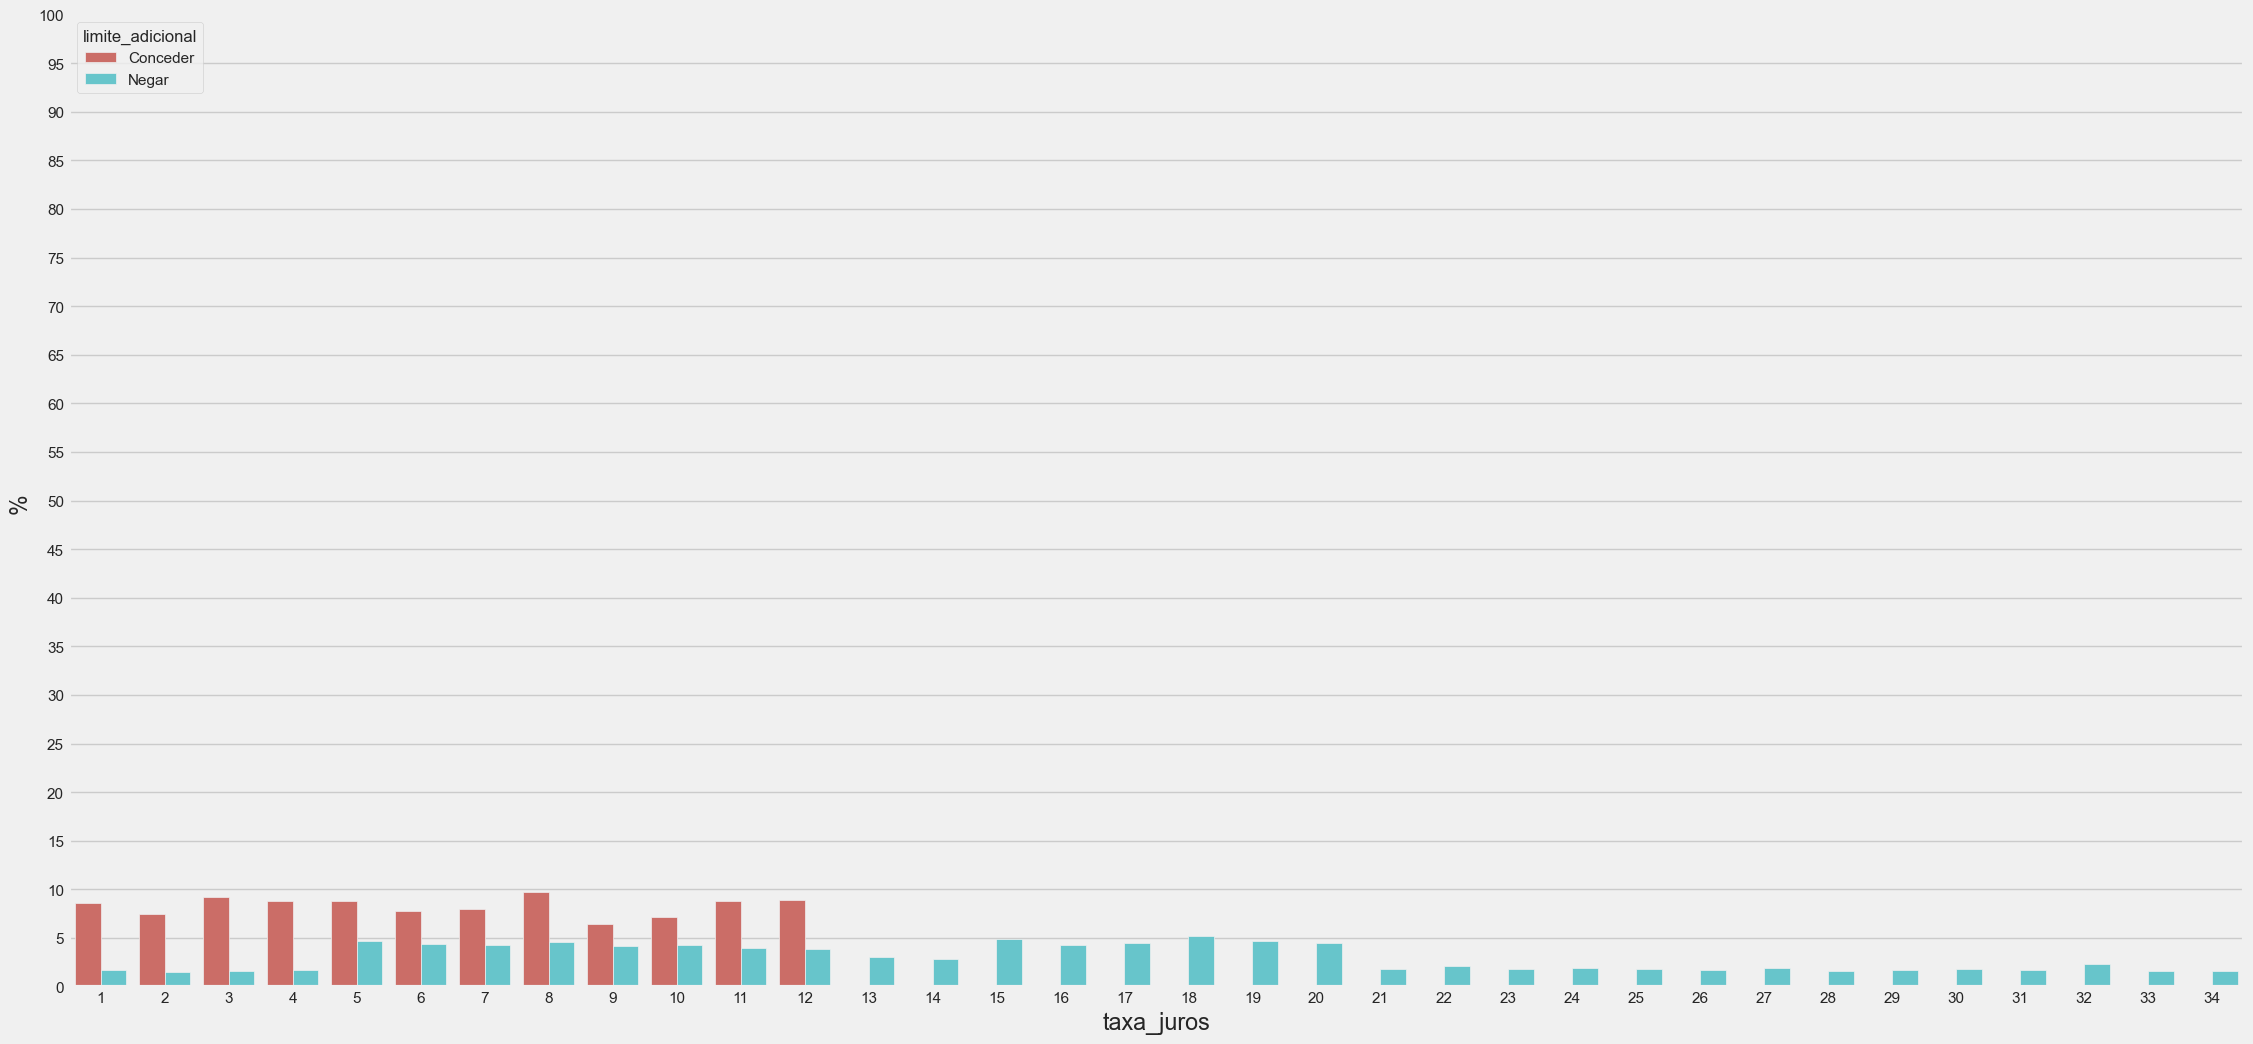

In [64]:
plt.figure(figsize=(12, 8))
for col in int_cols:
    plot_features(bivar_data, col, 'limite_adicional')